(regression)=
# Linear regression



The goal in this chapter is to introduce **_linear regression_**. Stripped to its bare essentials, linear regression models are basically a slightly fancier version of the [Pearson correlation](correl), though as we'll see, regression models are much more powerful tools.

Since the basic ideas in regression are closely tied to correlation, we'll return to the `parenthood.csv` file that we were using to illustrate how correlations work. Recall that, in this data set, we were trying to find out why Dan is so very grumpy all the time, and our working hypothesis was that I'm not getting enough sleep. 

In [1]:
# conditional install pingouin in Google Colab since we're going to use it later
try:
  import pingouin as pg
except ModuleNotFoundError:
  if 'google.colab' in str(get_ipython()):
    %pip uninstall scipy -y
    %pip uninstall statsmodels -y
    %pip install pingouin

In [2]:
import pandas as pd

file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/parenthood.csv'
df = pd.read_csv(file)

df.head()

,dan_sleep,baby_sleep,dan_grump,day
0,7.59,10.18,56,1
1,7.91,11.66,60,2
2,5.14,7.92,82,3
3,7.71,9.61,55,4
4,6.68,9.75,67,5


We drew some scatterplots to help us examine the relationship between the amount of sleep I get, and my grumpiness the following day. 

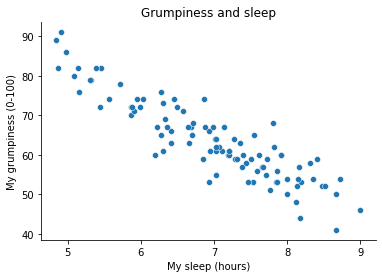

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns

fig = plt.figure()

ax = sns.scatterplot(data = df,
                x = 'dan_sleep', 
                y = 'dan_grump')
ax.set(title = 'Grumpiness and sleep', ylabel = 'My grumpiness (0-100)', xlabel='My sleep (hours)')
sns.despine()

plt.show()

 ```{glue:figure} sleepycorrelation-fig
:figwidth: 600px
:name: fig-sleepycorrelation

Scatterplot showing grumpiness as a function of hours slept.

```


The actual scatterplot that we draw is the one shown in {numref}`fig-sleepycorrelation`, and as we saw previously this corresponds to a correlation of $r=-.90$, but what we find ourselves secretly imagining is something that looks closer to the left panel in {numref}`fig-sleep_regressions_1`. That is, we mentally draw a straight line through the middle of the data. In statistics, this line that we're drawing is called a **_regression line_**. Notice that -- since we're not idiots -- the regression line goes through the middle of the data. We don't find ourselves imagining anything like the rather silly plot shown in the right panel in {numref}`fig-sleep_regressions_1`. 

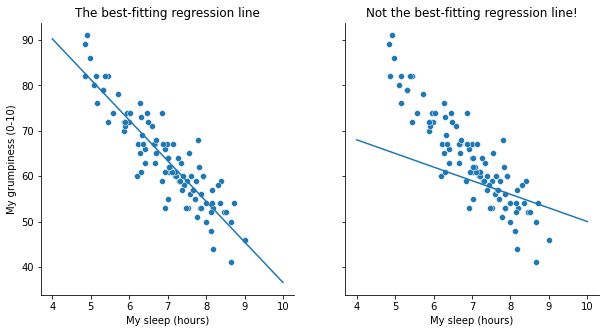

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# find the regression coefficients to allow manually plotting the line
model = smf.ols(formula="dan_grump ~ dan_sleep", data=df).fit()
intercept = model.params.Intercept
slope = model.params.dan_sleep


fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

x = np.linspace(4,10)


sns.scatterplot(data = df, x = 'dan_sleep', y = 'dan_grump', ax = axes[0])
fig.axes[0].set_title("The best-fitting regression line")
fig.axes[0].set_xlabel("My sleep (hours)")
fig.axes[0].set_ylabel("My grumpiness (0-10)")
fig.axes[0].plot(x,slope*x+intercept)

sns.scatterplot(data = df, x = 'dan_sleep', y = 'dan_grump', ax = axes[1])
fig.axes[1].set_title("Not the best-fitting regression line!")
fig.axes[1].set_xlabel("My sleep (hours)")
fig.axes[1].set_ylabel("My grumpiness (0-10)")
fig.axes[1].plot(x,-3*x+80)

sns.despine()

plt.show()


 ```{glue:figure} sleep_regressions_1-fig
:figwidth: 600px
:name: fig-sleep_regressions_1

The panel to the left shows the sleep-grumpiness scatterplot from {numref}`fig-sleepycorrelation` with the best fitting regression line drawn over the top. Not surprisingly, the line goes through the middle of the data. In contrast, the panel to the right shows the same data, but with a very poor choice of regression line drawn over the top.

```


This is not highly surprising: the line that I've drawn in panel to the right doesn't "fit" the data very well, so it doesn't make a lot of sense to propose it as a way of summarising the data, right? This is a very simple observation to make, but it turns out to be very powerful when we start trying to wrap just a little bit of maths around it. To do so, let's start with a refresher of some high school maths. The formula for a straight line is usually written like this:

$$
y = mx + c
$$ 


Or, at least, that's what it was when I went to high school all those years ago.[^americanhighschool] The two *variables* are $x$ and $y$, and we have two *coefficients*, $m$ and $c$. The coefficient $m$ represents the *slope* of the line, and the coefficient $c$ represents the *$y$-intercept* of the line. Digging further back into our decaying memories of high school (sorry, for some of us high school was a long time ago), we remember that the intercept is interpreted as "the value of $y$ that you get when $x=0$". Similarly, a slope of $m$ means that if you increase the $x$-value by 1 unit, then the $y$-value goes up by $m$ units; a negative slope means that the $y$-value would go down rather than up. Ah yes, it's all coming back to me now. 

Now that we've remembered that, it should come as no surprise to discover that we use the exact same formula to describe a regression line. If $Y$ is the outcome variable (the DV) and $X$ is the predictor variable (the IV), then the formula that describes our regression is written like this:

$$
\hat{Y_i} = b_1 X_i + b_0
$$

Hm. Looks like the same formula, but there's some extra frilly bits in this version. Let's make sure we understand them. Firstly, notice that I've written $X_i$ and $Y_i$ rather than just plain old $X$ and $Y$. This is because we want to remember that we're dealing with actual data. In this equation, $X_i$ is the value of predictor variable for the $i$th observation (i.e., the number of hours of sleep that I got on day $i$ of my little study), and $Y_i$ is the corresponding value of the outcome variable (i.e., my grumpiness on that day). And although I haven't said so explicitly in the equation, what we're assuming is that this formula works for all observations in the data set (i.e., for all $i$). Secondly, notice that I wrote $\hat{Y}_i$ and not $Y_i$. This is because we want to make the distinction between the *actual data* $Y_i$, and the *estimate* $\hat{Y}_i$ (i.e., the prediction that our regression line is making). Thirdly, I changed the letters used to describe the coefficients from $m$ and $c$ to $b_1$ and $b_0$. That's just the way that statisticians like to refer to the coefficients in a regression model. I've no idea why they chose $b$, but that's what they did. In any case $b_0$ always refers to the intercept term, and $b_1$ refers to the slope.


Excellent, excellent. Next, I can't help but notice that -- regardless of whether we're talking about the good regression line or the bad one -- the data don't fall perfectly on the line. Or, to say it another way, the data $Y_i$ are not identical to the predictions of the regression model $\hat{Y_i}$. Since statisticians love to attach letters, names and numbers to everything, let's refer to the difference between the model prediction and that actual data point as a *residual*, and we'll refer to it as $\epsilon_i$.[^noteepsilon] Written using mathematics, the residuals are defined as:

$$
\epsilon_i = Y_i - \hat{Y}_i
$$

which in turn means that we can write down the complete linear regression model as:

$$
Y_i = b_1 X_i + b_0 + \epsilon_i
$$

[^noteepsilon]: The $\epsilon$ symbol is the Greek letter epsilon. It's traditional to use $\epsilon_i$ or $e_i$ to denote a residual.

[^americanhighschool]: Translator's note: and when _I_ went to high school in the United States ca. [1990](https://en.wikipedia.org/wiki/1990) [CE](https://en.wikipedia.org/wiki/Common_Era)  we learned this as $y=ax+b$. Why? Who decides whether it is $a$ or $m$? $c$ or $b$? I truly have no idea, but either way, it represents the same idea.

(regressionestimation)=
## Estimating a linear regression model


Okay, now let's redraw our pictures, but this time I'll add some lines to show the size of the residual for all observations. When the regression line is good, our residuals (the lengths of the solid black lines) all look pretty small, as shown in the left panel of {numref}`fig-sleep_regressions_2`, but when the regression line is a bad one, the residuals are a lot larger, as you can see from looking at the right panel of {numref}`fig-sleep_regressions_2`. Hm. Maybe what we "want" in a regression model is *small* residuals. Yes, that does seem to make sense. In fact, I think I'll go so far as to say that the "best fitting" regression line is the one that has the smallest residuals. Or, better yet, since statisticians seem to like to take squares of everything why not say that ...

> The estimated regression coefficients, $\hat{b}_0$ and $\hat{b}_1$ are those that minimise the sum of the squared residuals, which we could either write as $\sum_i (Y_i - \hat{Y}_i)^2$ or as $\sum_i {\epsilon_i}^2$.

Yes, yes that sounds even better. And since I've indented it like that, it probably means that this is the right answer. And since this is the right answer, it's probably worth making a note of the fact that our regression coefficients are *estimates* (we're trying to guess the parameters that describe a population!), which is why I've added the little hats, so that we get $\hat{b}_0$ and $\hat{b}_1$ rather than $b_0$ and $b_1$. Finally, I should also note that -- since there's actually more than one way to estimate a regression model -- the more technical name for this estimation process is **_ordinary least squares (OLS) regression_**.  

At this point, we now have a concrete definition for what counts as our "best" choice of regression coefficients, $\hat{b}_0$ and $\hat{b}_1$. The natural question to ask next is,  if our optimal regression coefficients are those that minimise the sum squared residuals, how do we *find* these wonderful numbers? The actual answer to this question is complicated, and it doesn't help you understand the logic of regression.[^notekungfu] As a result, this time I'm going to let you off the hook. Instead of showing you how to do it the long and tedious way first, and then "revealing" the wonderful shortcut that Python provides you with, let's cut straight to the chase... and use Python to do all the heavy lifting. 


[^notekungfu]: Or at least, I'm assuming that it doesn't help most people. But on the off chance that someone reading this is a proper kung fu master of linear algebra (and to be fair, I always have a few of these people in my intro stats class), it *will* help *you* to know that the solution to the estimation problem turns out to be $\hat{b} = (X^TX)^{-1} X^T y$, where $\hat{b}$ is a vector containing the estimated regression coefficients,  $X$ is the "design matrix" that contains the predictor variables (plus an additional column containing all ones; strictly $X$ is a matrix of the regressors, but I haven't discussed the distinction yet), and $y$ is a vector containing the outcome variable. For everyone else, this isn't exactly helpful, and can be downright scary. However, since quite a few things in linear regression can be written in linear algebra terms, you'll see a bunch of footnotes like this one in this chapter. If you can follow the maths in them, great. If not, ignore it.

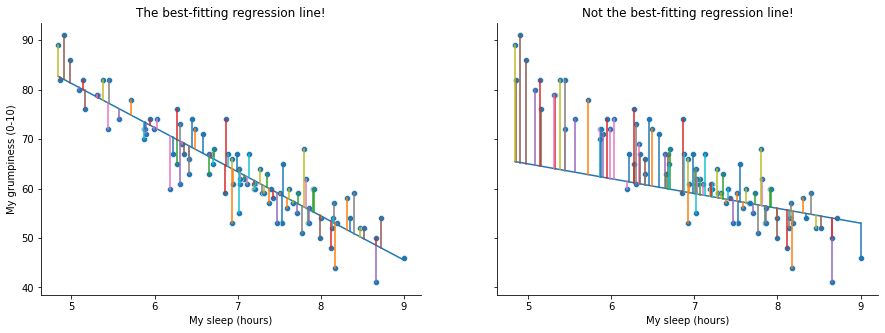

In [5]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

xData = df['dan_sleep']
yData = numpy.array(df['dan_grump'])

# (the solution to this figure stolen shamelessly from this stack-overflow answer by James Phillips:
# https://stackoverflow.com/questions/53779773/python-linear-regression-best-fit-line-with-residuals)

# fit linear regression model and save parameters
def func(x, a, b):
    return a * x + b

initialParameters = numpy.array([1.0, 1.0])

fittedParameters, pcov = curve_fit(func, xData, yData, initialParameters)

modelPredictions = func(xData, *fittedParameters) 

data = pd.DataFrame({'x': xData,
                     'y': yData})

# plot data points
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.scatterplot(data = data, x = 'x', y = 'y', ax = axes[0])
fig.axes[0].set_title("The best-fitting regression line!")
fig.axes[0].set_xlabel("My sleep (hours)")
fig.axes[0].set_ylabel("My grumpiness (0-10)")

# add regression line
xModel = numpy.linspace(min(xData), max(xData))
yModel = func(xModel, *fittedParameters)

axes[0].plot(xModel, yModel)

# add drop lines
for i in range(len(xData)):
    lineXdata = (xData[i], xData[i]) # same X
    lineYdata = (yData[i], modelPredictions[i]) # different Y
    axes[0].plot(lineXdata, lineYdata)

    
#####

# create poor-fitting model
badParameters = np.array([-3, 80])
badPredictions = func(xData, *badParameters) 

bad_xModel = numpy.linspace(min(xData), max(xData))
bad_yModel = func(bad_xModel, *badParameters)

# plot data with poor-fitting model
sns.scatterplot(data = data, x = 'x', y = 'y', ax = axes[1])
fig.axes[1].set_title("Not the best-fitting regression line!")
fig.axes[1].set_xlabel("My sleep (hours)")
fig.axes[1].set_ylabel("My grumpiness (0-10)")
fig.axes[1].plot(bad_xModel, bad_yModel)  

# add drop lines
for i in range(len(xData)):
    lineXdata = (xData[i], xData[i]) 
    lineYdata = (yData[i], badPredictions[i]) 
    axes[1].plot(lineXdata, lineYdata)
  
    
sns.despine()

plt.show()



 ```{glue:figure} sleep_regressions_2-fig
:figwidth: 600px
:name: fig-sleep_regressions_2

A depiction of the residuals associated with the best fitting regression line (left panel), and the residuals associated with a poor regression line (right panel). The residuals are much smaller for the good regression line. Again, this is no surprise given that the good line is the one that goes right through the middle of the data.

```

(pingouinregression)=
## Linear Regression with Python

As always, there are several different ways we could go about calculating a linear regression in Python, but we'll stick with `pingouin`[^drink], which for my money is one of the simplest and easiest packages to use. The `pingouin` command for linear regression is, well, `linear_regression`, so that couldn't be much more straightforward. After that, we just need to tell `pinguoin` which variable we want to use as a predictor variable (independent variable), and which one we want to use as the outcome variable (dependent variable). `pingouin` wants the predictor variable first, so, since we want to model my grumpiness as a function of my sleep, we write:

[^drink]: You saw that coming, didn't you? If not, then I bet you haven't read the sections on [t-tests](ttest) or [ANOVA](ANOVA) yet, have you? I'm such a shill for `pingouin`. 

In [6]:
import pingouin as pg

mod1 = pg.linear_regression(df['dan_sleep'], df['dan_grump'])

In [7]:
# Display results, rounded to two decimal places.
mod1.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,125.96,3.02,41.76,0.0,0.82,0.81,119.97,131.94
1,dan_sleep,-8.94,0.43,-20.85,0.0,0.82,0.81,-9.79,-8.09


As is its way, `pingouin` gives us a nice simple table, with a lot of information. Most importantly for now, we can see that `pingouin` has caclulated the intercept $\hat{b}_0 = 125.96$ and the slope $\hat{b}_1 = -8.94$. In other words, the best-fitting regression line that I plotted in {numref}`fig-sleep_regressions_1` has this formula: 

$$
\hat{Y}_i = -8.94 \ X_i + 125.96
$$ 

### Warning!!!

Remember, it's critical that you put the variables in the right order. If you reverse the predictor and outcome variables, `pinguoin` will happily calculate a result for you, but it will not be the one you are looking for. If instead, we had written `pg.linear_regression(df['dan_grump'], df['dan_sleep'])`, we would get the following:

In [8]:
modx = pg.linear_regression(df['dan_grump'], df['dan_sleep'])
modx.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,12.78,0.28,45.27,0.0,0.82,0.81,12.22,13.34
1,dan_grump,-0.09,0.00,-20.85,0.0,0.82,0.81,-0.10,-0.08


The output looks valid enough on the face of it, and it is even statistically significant. But in this model, we just predicted my son's sleepiness as a function of my grumpiness, which is madness! Reversing the direction of causality would make a great scifi movie[^noteNolan], but it's no good in statistics. So remember, predictor first, outcome second[^noteformula]

[^noteNolan]: Christopher Nolan, have your people call my people if you're interested, we'll do lunch!
[^noteformula]: This is extra confusing if you happen to have come from the world of R, where this sort of model is usually defined with a formula, in which the outcome measure comes first, followed by the predictor(s), or even if you have used `statsmodels`, which also preserves the R-style formula notation.

### Interpreting the estimated model

The most important thing to be able to understand is how to interpret these coefficients. Let's start with $\hat{b}_1$, the slope. If we remember the definition of the slope, a regression coefficient of $\hat{b}_1 = -8.94$ means that if I increase $X_i$ by 1, then I'm decreasing $Y_i$ by 8.94. That is, each additional hour of sleep that I gain will improve my mood, reducing my grumpiness by 8.94 grumpiness points. What about the intercept? Well, since $\hat{b}_0$ corresponds to "the expected value of $Y_i$ when $X_i$ equals 0", it's pretty straightforward. It implies that if I get zero hours of sleep ($X_i =0$) then my grumpiness will go off the scale, to an insane value of ($Y_i = 125.96$). Best to be avoided, I think.


(multipleregression)=
## Multiple linear regression

The simple linear regression model that we've discussed up to this point assumes that there's a single predictor variable that you're interested in, in this case `dan_sleep`. In fact, up to this point, *every* statistical tool that we've talked about has assumed that your analysis uses one predictor variable and one outcome variable. However, in many (perhaps most) research projects you actually have multiple predictors that you want to examine. If so, it would be nice to be able to extend the linear regression framework to be able to include multiple predictors. Perhaps some kind of **_multiple regression_** model would be in order?

Multiple regression is conceptually very simple. All we do is add more terms to our regression equation. Let's suppose that we've got two variables that we're interested in; perhaps we want to use both `dan_sleep` and `baby_sleep` to predict the `dan_grump` variable. As before, we let $Y_i$ refer to my grumpiness on the $i$-th day. But now we have two $X$ variables: the first corresponding to the amount of sleep I got and the second corresponding to the amount of sleep my son got. So we'll let $X_{i1}$ refer to the hours I slept on the $i$-th day, and $X_{i2}$ refers to the hours that the baby slept on that day. If so, then we can write our regression model like this:

$$
Y_i = b_2 X_{i2} + b_1 X_{i1} + b_0 + \epsilon_i
$$

As before, $\epsilon_i$ is the residual associated with the $i$-th observation, $\epsilon_i = {Y}_i - \hat{Y}_i$. In this model, we now have three coefficients that need to be estimated: $b_0$ is the intercept, $b_1$ is the coefficient associated with my sleep, and $b_2$ is the coefficient associated with my son's sleep. However, although the number of coefficients that need to be estimated has changed, the basic idea of how the estimation works is unchanged: our estimated coefficients $\hat{b}_0$, $\hat{b}_1$ and $\hat{b}_2$ are those that minimise the sum squared residuals. 

(pingouinmultiplelinearregression)=
## Multiple Linear Regression in Python

Doing mulitiple linear regression in `pingouin` is just as easy as adding some more predictor variables, like this:

In [9]:
 mod2 = pg.linear_regression(df[['dan_sleep', 'baby_sleep']], df['dan_grump'])

Still, there is one thing to watch out for. If you look carefully at the command above, you will notice that not only have we added a new predictor (`baby_sleep`), we have also added some extra brackets. While before our predictor variable was `['dan_sleep']`, now we have `[['dan_sleep', 'baby_sleep']]`. Why the extra set of `[]`?

This is because we are using the brackets in two different ways. When we wrote `['dan_sleep']`, the square brackets meant "select the column in the `pandas` dataframe with the header 'dan_sleep'". But now we are giving `pingouin` a _list_ of columns to select, and `list` objects are _also_ defined by square brackets in Python. To keep things clear, another way to achieve the same result would be to define the list of predictor variables outside the call to `pingouin`:

In [10]:
predictors = ['dan_sleep', 'baby_sleep']
outcome = 'dan_grump'

mod2 = pg.linear_regression(df[predictors], df[outcome])

You could even do all the work outside of `pinguoin`, like this:

In [11]:
predictors = df[['dan_sleep', 'baby_sleep']]
outcome = df['dan_grump']

mod2 = pg.linear_regression(predictors, outcome)

All three of these will give the same result, so it's up to you choose what makes most sense to you. But now it's time to take a look at the results:

In [12]:
mod2.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,125.97,3.04,41.42,0.00,0.82,0.81,119.93,132.00
1,dan_sleep,-8.95,0.55,-16.17,0.00,0.82,0.81,-10.05,-7.85
2,baby_sleep,0.01,0.27,0.04,0.97,0.82,0.81,-0.53,0.55


The coefficient associated with dan_sleep is quite large, suggesting that every hour of sleep I lose makes me a lot grumpier. However, the coefficient for baby_sleep is very small, suggesting that it doesn’t really matter how much sleep my son gets, not really. What matters as far as my grumpiness goes is how much sleep _I_ get. Although conceptually similar, multiple linear regressions are much harder to visualize than a simple linear regression with only one predictor. To get a sense of what this multiple regression model with two predictors looks like, {numref}`fig-sleep_regressions_3d` shows a 3D plot that plots all three variables, along with the regression model itself.

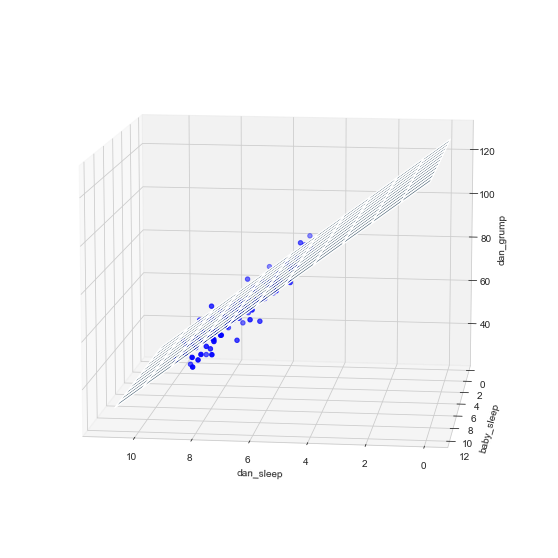

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# style the plot
sns.set_style("whitegrid")

# construct 3d plot space
fig = plt.figure(figsize=(25, 10)) 
ax = fig.add_subplot(111, projection = '3d')

# define axes
x = df['dan_sleep']
y = df['baby_sleep']
z = df['dan_grump']

# set axis labels
ax.set_xlabel("dan_sleep")
ax.set_ylabel("baby_sleep")
ax.set_zlabel("dan_grump")


# get intercept and regression coefficients from the lmm model
coefs = list(mod2['coef'][1:])
intercept = mod2['coef'][0]

# create a 3d plane representation of the lmm predictions
xs = np.tile(np.arange(12), (12,1))
ys = np.tile(np.arange(12), (12,1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
ax.plot_surface(xs,ys,zs, alpha=0.5)

# plot the data and plane
ax.plot_surface(xs,ys,zs, alpha=0.01)
ax.scatter(x, y, z, color = 'blue')

# adjust the viewing angle
ax.view_init(11,97)

plt.show()



 ```{glue:figure} sleep_regressions_3d-fig
:figwidth: 600px
:name: fig-sleep_regressions_3d

A 3D visualisation of a multiple regression model. There are two predictors in the model, `dan_sleep` and `baby_sleep`; the outcome variable is `dan.grump`. Together, these three variables form a 3D space: each observation (blue dots) is a point in this space. In much the same way that a simple linear regression model forms a line in 2D space, this multiple regression model forms a plane in 3D space. When we estimate the regression coefficients, what we're trying to do is find a plane that is as close to all the blue dots as possible.

```

### Formula for the general case

The equation that I gave above shows you what a multiple regression model looks like when you include two predictors. Not surprisingly, then, if you want more than two predictors, all you have to do is add more $X$ terms and more $b$ coefficients. In other words, if you have $K$ predictor variables in the model then the regression equation looks like this:

$$
Y_i = \left( \sum_{k=1}^K b_{k} X_{ik} \right) + b_0 + \epsilon_i
$$

(r2)=
## Quantifying the fit of the regression model

So we now know how to estimate the coefficients of a linear regression model. The problem is, we don't yet know if this regression model is any good. For example, our multiple linear regression model `mod2` *claims* that every hour of sleep will improve my mood by quite a lot, but it might just be rubbish. Remember, the regression model only produces a prediction $\hat{Y}_i$ about what my mood is like: my actual mood is $Y_i$. If these two are very close, then the regression model has done a good job. If they are very different, then it has done a bad job. 

### The $R^2$ value

Once again, let's wrap a little bit of mathematics around this. First, we've got the sum of the squared residuals:

$$
\mbox{SS}_{res} = \sum_i (Y_i - \hat{Y}_i)^2
$$

which we would hope to be pretty small. Specifically, what we'd like is for it to be very small in comparison to the total variability in the outcome variable, 

$$
\mbox{SS}_{tot} = \sum_i (Y_i - \bar{Y})^2
$$

While we're here, let's calculate these values in Python. Just to make my Python commands look a bit more similar to the mathematical equations, I'll create variables `X` and `Y`:

In [14]:
X = df['dan_sleep'] # the predictor
Y = df['dan_grump'] # the outcome

First, lets just examine the output for the simple model that uses only a single predictor:

In [15]:
mod1 = pg.linear_regression(X, Y)
mod1.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,125.96,3.02,41.76,0.0,0.82,0.81,119.97,131.94
1,dan_sleep,-8.94,0.43,-20.85,0.0,0.82,0.81,-9.79,-8.09


In this output, we can see that Python has calculated an intercept of 125.96 and a regression coefficient ($beta$) of -8.94. So for every hour of sleep I get, the model estimates that this will correspond to a decrease in grumpiness of about 9 on my incredibly scientific grumpiness scale. We can use this information to calculate $\hat{Y}$, that is, the values that the model _predicts_ for the outcome measure, as opposed to $Y$, which are the actual data we observed. So, for each value of the predictor variable X, we multiply that value by the regression coefficient -8.84, and add the intercept 125.97:

In [16]:

Y_pred = -8.94 * X + 125.97

Okay, now that we've got a variable which stores the regression model predictions for how grumpy I will be on any given day, let's calculate our sum of squared residuals. We would do that using the following command:

In [17]:
SS_resid = sum( (Y - Y_pred)**2 )
SS_resid

1838.7224883200004

Wonderful. A big number that doesn't mean very much. Still, let's forge boldly onwards anyway, and calculate the total sum of squares as well. That's also pretty simple:

In [18]:
import numpy as np
SS_tot = sum( (Y - np.mean(Y))**2 )
SS_tot

9998.590000000002


Hm. Well, it's a much bigger number than the last one, so this does suggest that our regression model was making good predictions. But it's not very interpretable. 

Perhaps we can fix this. What we'd like to do is to convert these two fairly meaningless numbers into one number. A nice, interpretable number, which for no particular reason we'll call $R^2$. What we would like is for the value of $R^2$ to be equal to 1 if the regression model makes no errors in predicting the data. In other words, if it turns out that the residual errors are zero, that is, if $\mbox{SS}_{res} = 0$, then we expect $R^2 = 1$. Similarly, if the model is completely useless, we would like $R^2$ to be equal to 0. What do I mean by "useless"? Tempting as it is demand that the regression model move out of the house, cut its hair and get a real job, I'm probably going to have to pick a more practical definition: in this case, all I mean is that the residual sum of squares is no smaller than the total sum of squares, $\mbox{SS}_{res} = \mbox{SS}_{tot}$. Wait, why don't we do exactly that? In fact, the formula that provides us with our $R^2$ value is pretty simple to write down,

$$
R^2 = 1 - \frac{\mbox{SS}_{res}}{\mbox{SS}_{tot}}
$$

and equally simple to calculate in Python:

In [19]:
R2 = 1- (SS_resid / SS_tot)
R2

0.816101821524835

The $R^2$ value, sometimes called the **_coefficient of determination_**[^notenever] has a simple interpretation: it is the *proportion* of the variance in the outcome variable that can be accounted for by the predictor. So in this case, the fact that we have obtained $R^2 = .816$ means that the predictor (`my_sleep`) explains 81.6\% of the variance in the outcome (`my_grump`). 

Naturally, you don't actually need to type in all these commands yourself if you want to obtain the $R^2$ value for your regression model. And as you have probably already noticed, `pingouin` calculates $R^2$  for us without even being asked to. But there's another property of $R^2$ that I want to point out. 

[^notenever]: And by "sometimes" I mean "almost never". In practice everyone just calls it "$R$-squared".

### The relationship between regression and correlation

At this point we can revisit my earlier claim that regression, in this very simple form that I've discussed so far, is basically the same thing as a correlation. Previously, we used the symbol $r$ to denote a Pearson correlation. Might there be some relationship between the value of the correlation coefficient $r$ and the $R^2$ value from linear regression? Of course there is: the squared correlation $r^2$ is identical to the $R^2$ value for a linear regression with only a single predictor. To illustrate this, here's the squared correlation:

In [20]:
r = X.corr(Y)  # calculate the correlation
r**2    # print the squared correlation

0.8161027191478786


Yep, same number. In other words, running a Pearson correlation is more or less equivalent to running a linear regression model that uses only one predictor variable.

### The adjusted $R^2$ value

One final thing to point out before moving on. It's quite common for people to report a slightly different measure of model performance, known as "adjusted $R^2$". The motivation behind calculating the adjusted $R^2$ value is the observation that adding more predictors into the model will *always* cause the $R^2$ value to increase (or at least not decrease). The adjusted $R^2$ value introduces a slight change to the calculation, as follows. For a regression model with $K$ predictors, fit to a data set containing $N$ observations, the adjusted $R^2$ is:

$$
\mbox{adj. } R^2 = 1 - \left(\frac{\mbox{SS}_{res}}{\mbox{SS}_{tot}} \times \frac{N-1}{N-K-1} \right)
$$

This adjustment is an attempt to take the degrees of freedom into account. The big advantage of the adjusted $R^2$ value is that when you add more predictors to the model, the adjusted $R^2$ value will only increase if the new variables improve the model performance more than you'd expect by chance. The big disadvantage is that the adjusted $R^2$ value *can't* be interpreted in the elegant way that $R^2$ can. $R^2$ has a simple interpretation as the proportion of variance in the outcome variable that is explained by the regression model; to my knowledge, no equivalent interpretation exists for adjusted $R^2$. 

An obvious question then, is whether you should report $R^2$ or adjusted $R^2$. This is probably a matter of personal preference. If you care more about interpretability, then $R^2$ is better. If you care more about correcting for bias, then adjusted $R^2$ is probably better. Speaking just for myself, I prefer $R^2$: my feeling is that it's more important to be able to interpret your measure of model performance. Besides, as we'll soon see in the upcoming section on hypothesis tests for regression models, which I am going to link to even though it is [literally the next section in this book](regressiontests), if you're worried that the improvement in $R^2$ that you get by adding a predictor is just due to chance and not because it's a better model, well, we've got hypothesis tests for that. 

(regressiontests)=
## Hypothesis tests for regression models

So far we've talked about what a regression model is, how the coefficients of a regression model are estimated, and how we quantify the performance of the model (the last of these, incidentally, is basically our measure of effect size). The next thing we need to talk about is hypothesis tests. There are two different (but related) kinds of hypothesis tests that we need to talk about: those in which we test whether the regression model as a whole is performing significantly better than a null model; and those in which we test whether a particular regression coefficient is significantly different from zero. 

At this point, you're probably groaning internally, thinking that I'm going to introduce a whole new collection of tests. You're probably sick of hypothesis tests by now, and don't want to learn any new ones. Me too. I'm so sick of hypothesis tests that I'm going to shamelessly reuse the $F$-test from the [chapter on ANOVAs](anova) and the $t$-test from [the chapter on t-tests](ttest). In fact, all I'm going to do in this section is show you how those tests are imported wholesale into the regression framework.  

### Testing the model as a whole

Okay, suppose you've estimated your regression model. The first hypothesis test you might want to try is one in which the null hypothesis that there is *no relationship* between the predictors and the outcome, and the alternative hypothesis is that *the data are distributed in exactly the way that the regression model predicts*. Formally, our "null model" corresponds to the fairly trivial "regression" model in which we include 0 predictors, and only include the intercept term $b_0$

$$
H_0: Y_i = b_0 + \epsilon_i
$$

If our regression model has $K$ predictors, the "alternative model" is described using the usual formula for a multiple regression model:

$$
H_1: Y_i = \left( \sum_{k=1}^K b_{k} X_{ik} \right) + b_0 + \epsilon_i
$$

How can we test these two hypotheses against each other? The trick is to understand that just like we did with ANOVA, it's possible to divide up the total variance $\mbox{SS}_{tot}$ into the sum of the residual variance $\mbox{SS}_{res}$ and the regression model variance $\mbox{SS}_{mod}$. I'll skip over the technicalities, since we covered most of them in the [ANOVA chapter](anova), and just note that:

$$
\mbox{SS}_{mod} = \mbox{SS}_{tot} - \mbox{SS}_{res}
$$

And, just like we did with the ANOVA, we can convert the sums of squares into mean squares by dividing by the degrees of freedom. 

$$
\begin{array}{rcl}
\mbox{MS}_{mod} &=& \displaystyle\frac{\mbox{SS}_{mod} }{df_{mod}} \\ \\
\mbox{MS}_{res} &=& \displaystyle\frac{\mbox{SS}_{res} }{df_{res} }
\end{array}
$$

So, how many degrees of freedom do we have? As you might expect, the $df$ associated with the model is closely tied to the number of predictors that we've included. In fact, it turns out that $df_{mod} = K$. For the residuals, the total degrees of freedom is $df_{res} = N -K - 1$. 

Now that we've got our mean square values, you're probably going to be entirely unsurprised (possibly even bored) to discover that we can calculate an $F$-statistic like this:

$$
F =  \frac{\mbox{MS}_{mod}}{\mbox{MS}_{res}}
$$

and the degrees of freedom associated with this are $K$ and $N-K-1$. This $F$ statistic has exactly the same interpretation as the one we introduced [when learning about ANOVAs](anova). Large $F$ values indicate that the null hypothesis is performing poorly in comparison to the alternative hypothesis.

"Ok, this is fine", I hear you say, "but now show me the easy way! Show me how easy it is to get an $F$ statistic from `pingouin`! `pingouin` makes everything so much easier! Surely `pingouin` does this for me as well?"

Yeah. About that... actually, as of the time of writing (Tuesday the 17th of May, 2022), `pingouin` does _not_ automatically calculate the $F$ statistic for the model for you. This seems like kind of a strange omission to me, since it is pretty normal to report overall $F$ and $p$ values for a model, and `pingouin` seems to be all about making the normal things easy. So, I can only assume this will get added at some point, but for now, sadly, we are left to ourselves on this one. 

I should mention that there are other statistics packages for Python that will do this for you. [statsmodels](https://www.statsmodels.org/stable/regression.html) comes to mind, for instance. But this is opening a whole new can of worms that I'd rather avoid for now, so instead I provide you with code to calculate the $F$ statistic and $p$-value for the model "manually" below:

In [21]:
import numpy as np
from scipy import stats as st

# your predictor and outcome variables (aka, "the data")
predictors = df[['dan_sleep', 'baby_sleep']]
outcome = df['dan_grump']

# model the data, and store the model information in a variable called "mod"
mod = pg.linear_regression(predictors, outcome)


# call the outcome data "Y", just for the sake of generalizability
Y = outcome

# get the model residuals from the model object
res = mod.residuals_

# calculate the residual, the model, and the total sums of squares
SS_res = np.sum(np.square(res))
SS_tot = sum( (Y - np.mean(Y))**2 )
SS_mod = SS_tot - SS_res

# get the degrees of freedom for the model and the residuals
df_mod = mod.df_model_
df_res = mod.df_resid_

# caluculate the mean squares for the model and the residuals
MS_mod = SS_mod / df_mod
MS_res = SS_res / df_res

# calculate the F-statistic
F = MS_mod / MS_res

# estimate the p-value
p = st.f.sf(F, df_mod, df_res)

# display the results
print("F=",F, "p=", p)


F= 215.23828653684436 p= 2.145730016320891e-36


(ftestfunction)=
### An F-test function

A more compact way to do this would be to take everything I have done above and put it inside a [function](functions). I've done this below, not least so that I will be able to copy/paste from it myself at some later date. Here is a function called `regression_f` that takes as its arguments a list of predictors, and an outcome variable, and spits out the $F$ and $p$ values.

In [22]:
def regression_f(predictors, outcome):
    mod = pg.linear_regression(predictors, outcome)
    Y = outcome
    res = mod.residuals_
    SS_res = np.sum(np.square(res))
    SS_tot = sum( (Y - np.mean(Y))**2 )
    SS_mod = SS_tot - SS_res
    df_mod = mod.df_model_
    df_res = mod.df_resid_
    MS_mod = SS_mod / df_mod
    MS_res = SS_res / df_res
    F = MS_mod / MS_res
    p = st.f.sf(F, df_mod, df_res)
    return(F, p)

Once we have run the function, all we need to do is plug in our values, and `regression_f` does the rest:

In [23]:
predictors = df[['dan_sleep', 'baby_sleep']]
outcome = df['dan_grump']

regression_f(predictors, outcome)

(215.23828653684436, 2.145730016320891e-36)

### Tests for individual coefficients

The $F$-test that we've just introduced is useful for checking that the model as a whole is performing better than chance. This is important: if your regression model doesn't produce a significant result for the $F$-test then you probably don't have a very good regression model (or, quite possibly, you don't have very good data). However, while failing this test is a pretty strong indicator that the model has problems, *passing* the test (i.e., rejecting the null) doesn't imply that the model is good! Why is that, you might be wondering? The answer to that can be found by looking at the coefficients for the multiple linear regression model we calculated earlier:

In [24]:
predictors = df[['dan_sleep', 'baby_sleep']]
outcome = df['dan_grump']

mod2 = pg.linear_regression(predictors, outcome)
mod2.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,125.97,3.04,41.42,0.00,0.82,0.81,119.93,132.00
1,dan_sleep,-8.95,0.55,-16.17,0.00,0.82,0.81,-10.05,-7.85
2,baby_sleep,0.01,0.27,0.04,0.97,0.82,0.81,-0.53,0.55



I can't help but notice that the estimated regression coefficient for the `baby_sleep` variable is tiny (0.01), relative to the value that we get for `dan_sleep` (-8.95). Given that these two variables are absolutely on the same scale (they're both measured in "hours slept"), I find this suspicious. In fact, I'm beginning to suspect that it's really only the amount of sleep that *I* get that matters in order to predict my grumpiness.

Once again, we can reuse a hypothesis test that we discussed earlier, this time the $t$-test. The test that we're interested has a null hypothesis that the true regression coefficient is zero ($b = 0$), which is to be tested against the alternative hypothesis that it isn't ($b \neq 0$). That is:

$$
\begin{array}{rl}
H_0: & b = 0 \\
H_1: & b \neq 0 
\end{array}
$$

How can we test this? Well, if the [central limit theorem](clt) is kind to us, we might be able to guess that the sampling distribution of $\hat{b}$, the estimated regression coefficient, is a normal distribution with mean centred on $b$. What that would mean is that if the null hypothesis were true, then the sampling distribution of $\hat{b}$ has mean zero and unknown standard deviation. Assuming that we can come up with a good estimate for the [standard error](clt) of the regression coefficient, $\mbox{SE}({\hat{b}})$, then we're in luck. That's *exactly* the situation for which we introduced the one-sample $t$ way back in [the chapter on t-tests](ttest). So let's define a $t$-statistic like this,

$$
t = \frac{\hat{b}}{\mbox{SE}({\hat{b})}}
$$

I'll skip over the reasons why, but our degrees of freedom in this case are $df = N- K- 1$. Irritatingly, the estimate of the standard error of the regression coefficient, $\mbox{SE}({\hat{b}})$, is not as easy to calculate as the standard error of the mean that we used for the simpler $t$-tests [earlier](ttest). In fact, the formula is somewhat ugly, and not terribly helpful to look at. For our purposes it's sufficient to point out that the standard error of the  estimated regression coefficient depends on both the predictor and outcome variables, and is somewhat sensitive to violations of the homogeneity of variance assumption (discussed shortly). 

In any case, this $t$-statistic can be interpreted in the same way as the $t$-statistics that we discussed [earlier](ttest). Assuming that you have a two-sided alternative (i.e., you don't really care if $b >0$ or $b < 0$), then it's the extreme values of $t$ (i.e., a lot less than zero or a lot greater than zero) that suggest that you should reject the null hypothesis. 

Now we are in a position to understand all the values in the multiple regression table provided by `pingouin`:

In [25]:
mod2.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,125.97,3.04,41.42,0.00,0.82,0.81,119.93,132.00
1,dan_sleep,-8.95,0.55,-16.17,0.00,0.82,0.81,-10.05,-7.85
2,baby_sleep,0.01,0.27,0.04,0.97,0.82,0.81,-0.53,0.55


Each row in this table refers to one of the coefficients in the regression model. The first row is the intercept term, and the later ones look at each of the predictors. The columns give you all of the relevant information. The `coef` column is the actual estimate of $b$ (e.g., 125.96 for the intercept, -8.9 for the `dan_sleep` predictor, and 0.01 for the `baby_sleep` predictor). The `se` column is the standard error estimate $\hat\sigma_b$. The `T` column gives you the $t$-statistic, and it's worth noticing that in this table $t= \hat{b}/\mbox{SE}({\hat{b}})$ every time. The `pval` column gives you the actual $p$ value for each of these tests.[^notecorrection] The `r2`and àdj_r2` columns give the $R^2$ value and the adjusted $R^2$ for the model, and the last two columns give us the upper and lower [confidence interval](ci) bounds for each estimate.

[^notecorrection]: Note that, although `pingouin` has done multiple tests here, it hasn't done a Bonferroni correction or anything. These are standard one-sample $t$-tests with a two-sided alternative. If you want to make corrections for multiple tests, you need to do that yourself.

If we add our [F-test results](ftestfunction) to the mix:

In [26]:
f = regression_f(predictors, outcome)
print("F:", f[0].round(2), "p:", f[1])

F: 215.24 p: 2.145730016320891e-36


we have everything we need to evaluate our model. In this case, the model performs significantly better than you'd expect by chance ($F(2,97) = 215.2$, $p<.001$), which isn't all that surprising: the $R^2 = .812$ value indicate that the regression model accounts for 81.2\% of the variability in the outcome measure. However, when we look back up at the $t$-tests for each of the individual coefficients, we have pretty strong evidence that the `baby_sleep` variable has no significant effect; all the work is being done by the `dan_sleep` variable. Taken together, these results suggest that `mod2` is actually the wrong model for the data: you'd probably be better off dropping the `baby_sleep` predictor entirely. In other words, the `mod1` model that we started with is the better model. 

(corrhyp)=
## Testing the significance of a correlation


### Hypothesis tests for a single correlation

I don't want to spend too much time on this, but it's worth very briefly returning to the point I made earlier, that Pearson correlations are basically the same thing as linear regressions with only a single predictor added to the model. What this means is that the hypothesis tests that I just described in a regression context can also be applied to correlation coefficients. To see this, let's just revist our `mod1` model:

In [27]:
X = df['dan_sleep'] # the predictor
Y = df['dan_grump'] # the outcome
mod1 = pg.linear_regression(X, Y)
mod1.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,125.96,3.02,41.76,0.0,0.82,0.81,119.97,131.94
1,dan_sleep,-8.94,0.43,-20.85,0.0,0.82,0.81,-9.79,-8.09


The important thing to note here is the $t$ test associated with the predictor, in which we get a result of $t(98) = -20.85$, $p<.001$. Now let's compare this to the output of the `corr` function from `pinguoin`, which runs a hypothesis test to see if the observed correlation between two variables is significantly different from 0. 

In [28]:
pg.corr(X,Y)

,n,r,CI95%,p-val,BF10,power
pearson,100,-0.903384,"[-0.93, -0.86]",8.176426e-38,2.591e+34,1.0


Now, just like the $F$-test from earlier, `pingouin` unfortunately doesn't calculate a $t$-statistic for us automatically when running a correlation. But the formula for the $t$-statistic of a Pearson correlation is just


$$
t = r\sqrt{\frac{n-2}{1-r^2}}
$$

so, with the output from `pg.corr(X,Y)` above, it's not too difficult to find $t$:

In [29]:
from math import sqrt

t = -0.903384*sqrt((100-2) / (1-(-0.903384)**2))
t

-20.85439996017091

Look familiar? -20.85 was the same $t$-value that we got when we ran the regression model. That's because the test for the significance of a correlation is identical to the $t$ test that we run on a coefficient in a regression model. 

(corrhyp2)=
### Hypothesis tests for all pairwise correlations

Okay, one more digression before I return to regression properly. In the previous section I talked about you can run a hypothesis test on a single correlation. But we aren't restricted to computing a single correlation: you can compute *all* pairwise correlations among the variables in your data set. This leads people to the natural question: can we also run hypothesis tests on all of the pairwise correlations in our data using `pg.corr`?

The answer is no, and there's a very good reason for this. Testing a single correlation is fine: if you've got some reason to be asking "is A related to B?", then you should absolutely run a test to see if there's a significant correlation. But if you've got variables A, B, C, D and E and you're thinking about testing the correlations among all possible pairs of these, a statistician would want to ask: what's your hypothesis? If you're in the position of wanting to test all possible pairs of variables, then you're pretty clearly on a fishing expedition, hunting around in search of significant effects when you don't actually have a clear research hypothesis in mind. This is *dangerous*, and perhaps the authors of the `corr` function didn't want to endorse this sort of behavior. `corr` does have the nice feature that you can call it as an attribute of your dataframe, so for our parenthood data, if we want to see all the parwise correlations in the data, you can simply write

In [30]:
df.corr()

,dan_sleep,baby_sleep,dan_grump,day
dan_sleep,1.000000,0.627949,-0.903384,-0.098408
baby_sleep,0.627949,1.000000,-0.565964,-0.010434
dan_grump,-0.903384,-0.565964,1.000000,0.076479
day,-0.098408,-0.010434,0.076479,1.000000


and you get a nice correlation matrix, but no p-values.

On the other hand... a somewhat less hardline view might be to argue we've encountered this situation before, back when we talked about *post hoc tests* in ANOVA. When running post hoc tests, we didn't have any specific comparisons in mind, so what we did was apply a correction (e.g., Bonferroni, Holm, etc) in order to avoid the possibility of an inflated Type I error rate. From this perspective, it's okay to run hypothesis tests on all your pairwise correlations, but you must treat them as post hoc analyses, and if so you need to apply a correction for multiple comparisons. `rcorr`, also from `pingouin`, lets you do this. You can use the `padjust` argument to specify what kind of correction you would like to apply; here I have chosen a Bonferroni correction:

In [31]:
df.rcorr(padjust = 'bonf')

,dan_sleep,baby_sleep,dan_grump,day
dan_sleep,-,***,***,
baby_sleep,0.628,-,***,
dan_grump,-0.903,-0.566,-,
day,-0.098,-0.01,0.076,-


The little stars indicate the "significance level": one star for $p<0.05$, two stars for $p<0.01$, and three stars for $p<0.001$.

So there you have it. If you really desperately want to do pairwise hypothesis tests on your correlations, the `rcorr` function will let you do it. But please, **please** be careful. I can't count the number of times I've had a student panicking in my office because they've run these pairwise correlation tests, and they get one or two significant results that don't make any sense. For some reason, the moment people see those little significance stars appear, they feel compelled to throw away all common sense and assume that the results must correspond to something real that requires an explanation. In most such cases, my experience has been that the right answer is "it's a Type I error". Remember when we talked about the [family-wise error rate](fwer)? The more tests you do on the same data, the greater your chances of finding statistically significant results just by, uh, chance.

(regressioncoefs)=
### Calculating standardised regression coefficients

One more thing that you might want to do is to calculate "standardised" regression coefficients, often denoted $\beta$. The rationale behind standardised coefficients goes like this. In a lot of situations, your variables are on fundamentally different scales. Suppose, for example, my regression model aims to predict people's IQ scores, using their educational attainment (number of years of education) and their income as predictors. Obviously, educational attainment and income are not on the same scales: the number of years of schooling can only vary by 10s of years, whereas income would vary by 10,000s of dollars (or more). The units of measurement have a big influence on the regression coefficients: the $b$ coefficients only make sense when interpreted in light of the units, both of the predictor variables and the outcome variable. This makes it very difficult to compare the coefficients of different predictors. Yet there are situations where you really do want to make comparisons between different coefficients. Specifically, you might want some kind of standard measure of which predictors have the strongest relationship to the outcome. This is what **_standardised coefficients_** aim to do. 

The basic idea is quite simple: the standardised coefficients are the coefficients that you would have obtained if you'd converted all the variables to [standard scores](zscores) $z$-scores before running the regression.[^noteregressors]  The idea here is that, by converting all the predictors to $z$-scores, they all go into the regression on the same scale, thereby removing the problem of having variables on different scales. Regardless of what the original variables were, a $\beta$ value of 1 means that an increase in the predictor of 1 standard deviation will produce a corresponding 1 standard deviation increase in the outcome variable. Therefore, if variable A has a larger absolute value of $\beta$ than variable B, it is deemed to have a stronger relationship with the outcome. Or at least that's the idea: it's worth being a little cautious here, since this does rely very heavily on the assumption that "a 1 standard deviation change" is fundamentally the same kind of thing for all variables. It's not always obvious that this is true. 

[^noteregressors]: Strictly, you standardise all the *regressors*: that is, every "thing" that has a regression coefficient associated with it in the model. For the regression models that I've talked about so far, each predictor variable maps onto exactly one regressor, and vice versa. However, that's not actually true in general: we'll see some examples of this when we learn about [factorial ANOVA](anova2). But for now, we don't need to care too much about this distinction.

Still, let's give it a try on the `parenthood` data.



In [32]:
from scipy import stats
import pingouin as pg

df['dan_sleep_standard'] = stats.zscore(df['dan_sleep'])
df['baby_sleep_standard'] = stats.zscore(df['baby_sleep'])
df['dan_grump'] = stats.zscore(df['dan_grump'])


predictors = df[['dan_sleep_standard', 'baby_sleep_standard']]
outcome = df['dan_grump']

mod3 = pg.linear_regression(predictors, outcome)
mod3.round(4)


,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-0.0000,0.0435,-0.0000,1.0000,0.8161,0.8123,-0.0864,0.0864
1,dan_sleep_standard,-0.9047,0.0559,-16.1715,0.0000,0.8161,0.8123,-1.0158,-0.7937
2,baby_sleep_standard,0.0022,0.0559,0.0388,0.9691,0.8161,0.8123,-0.1089,0.1132


This clearly shows that the `dan_sleep` variable has a much stronger effect than the `baby_sleep` variable. However, this is a perfect example of a situation where it would probably make sense to use the original coefficients $b$ rather than the standardised coefficients $\beta$. After all, my sleep and the baby's sleep are *already* on the same scale: number of hours slept. Why complicate matters by converting these to $z$-scores?

(regressionassumptions)=

## Assumptions of regression

The linear regression model that I've been discussing relies on several assumptions. In the section on [regression diagnostics](regressiondiagnostics) we'll talk a lot more about how to check that these assumptions are being met, but first, let's have a look at each of them.


- *Normality*. Like half the models in statistics, standard linear regression relies on an assumption of normality. Specifically, it assumes that the *residuals* are normally distributed. It's actually okay if the predictors $X$ and the outcome $Y$ are non-normal, so long as the residuals $\epsilon$ are normal. See [](regressionnormality).
- *Linearity*. A pretty fundamental assumption of the linear regression model is that relationship between $X$ and $Y$ actually be linear! Regardless of whether it's a simple regression or a multiple regression, we assume that the relatiships involved are linear. See [](regressionlinearity).
- *Homogeneity of variance*. Strictly speaking, the regression model assumes that each residual $\epsilon_i$ is generated from a normal distribution with mean 0, and (more importantly for the current purposes) with a standard deviation $\sigma$ that is the same for every single residual. In practice, it's impossible to test the assumption that every residual is identically distributed. Instead, what we care about is that the standard deviation of the residual is the same for all values of $\hat{Y}$, and (if we're being especially paranoid) all values of every predictor $X$ in the model. See [](regressionhomogeneity).
- *Uncorrelated predictors*. The idea here is that, is a multiple regression model, you don't want your predictors to be too strongly correlated with each other. This isn't  "technically" an assumption of the regression model, but in practice it's required. Predictors that are too strongly correlated with each other (referred to as "collinearity") can cause problems when evaluating the model. See [](regressioncollinearity)
- *Residuals are independent of each other*. This is really just a "catch all" assumption, to the effect that "there's nothing else funny going on in the residuals". If there is something weird (e.g., the residuals all depend heavily on some other unmeasured variable) going on, it might screw things up.
- *No "bad" outliers*. Again, not actually a technical assumption of the model (or rather, it's sort of implied by all the others), but there is an implicit assumption that your regression model isn't being too strongly influenced by one or two anomalous data points; since this raises questions about the adequacy of the model, and the trustworthiness of the data in some cases. See [](regressionoutliers).



(regressiondiagnostics)=
## Model checking

The main focus of this section is **_regression diagnostics_**, a term that refers to the art of checking that the assumptions of your regression model have been met, figuring out how to fix the model if the assumptions are violated, and generally to check that nothing "funny" is going on. I refer to this as the "art" of model checking with good reason: it's not easy, and while there are a lot of fairly standardised tools that you can use to diagnose and maybe even cure the problems that ail your model (if there are any, that is!), you really do need to exercise a certain amount of judgment when doing this. It's easy to get lost in all the details of checking this thing or that thing, and it's quite exhausting to try to remember what all the different things are. This has the very nasty side effect that a lot of people get frustrated when trying to learn *all* the tools, so instead they decide not to do *any* model checking. This is a bit of a worry! 

In this section, I describe several different things you can do to check that your regression model is doing what it's supposed to. It doesn't cover the full range of things you could do, but it's still much more detailed than what I see a lot of people doing in practice; and I don't usually cover all of this in my intro stats class myself. However, I do think it's important that you get a sense of what tools are at your disposal, so I'll try to introduce a bunch of them here. 


### Three kinds of residuals

The majority of regression diagnostics revolve around looking at the residuals, and by now you've probably formed a sufficiently pessimistic theory of statistics to be able to guess that -- precisely *because* of the fact that we care a lot about the residuals -- there are several different kinds of  residual that we might consider. In particular, the following three kinds of residual are referred to in this section: "ordinary residuals", "standardised residuals", and "Studentised residuals". There is a fourth kind that you'll see referred to in some of the figures, and that's the "Pearson residual": however, for the models that we're talking about in this chapter, the Pearson residual is identical to the ordinary residual. 

The first and simplest kind of residuals that we care about are **_ordinary residuals_**. These are the actual, raw residuals that I've been talking about throughout this chapter. The ordinary residual is just the difference between the fitted value $\hat{Y}_i$ and the observed value $Y_i$. I've been using the notation $\epsilon_i$ to refer to the $i$-th ordinary residual, and by gum I'm going to stick to it. With this in mind, we have the very simple equation

$$
\epsilon_i = Y_i - \hat{Y}_i
$$

This is of course what we saw earlier, and unless I specifically refer to some other kind of residual, this is the one I'm talking about. So there's nothing new here: I just wanted to repeat myself. In any case, if you have run your regression model using `pingouin`, you can access the residuals from your model (in our case, our `mod2`)like this:

In [33]:
res = mod2.residuals_

One drawback to using ordinary residuals is that they're always on a different scale, depending on what the outcome variable is and how good the regression model is. That is, unless you've decided to run a regression model without an intercept term, the ordinary residuals will have mean 0; but the variance is different for every regression. In a lot of contexts, especially where you're only interested in the *pattern* of the residuals and not their actual values, it's convenient to estimate the **_standardised residuals_**, which are normalised in such a way as to have standard deviation 1. The way we calculate these is to divide the ordinary residual by an estimate of the (population) standard deviation of these residuals. For technical reasons, mumble mumble, the formula for this is:

$$
\epsilon_{i}^\prime = \frac{\epsilon_i}{\hat{\sigma} \sqrt{1-h_i}}
$$

where $\hat\sigma$ in this context is the estimated population standard deviation of the ordinary residuals, and $h_i$ is the "hat value" of the $i$th observation. I haven't explained hat values to you yet (but have no fear,[^notehope] it's coming shortly), so this won't make a lot of sense. For now, it's enough to interpret the standardised residuals as if we'd converted the ordinary residuals to $z$-scores. In fact, that is more or less the truth, it's just that we're being a bit fancier. Now, unfortunately, `pingouin` does not provide standardized residuals, so if we want to inspect these, the best option is probably `statsmodels`:

[^notehope]: Or have no hope, as the case may be.

In [34]:
import statsmodels.api as sm

predictors = df[['dan_sleep', 'baby_sleep']]
outcome = df['dan_grump']

## fit regression model
predictors = sm.add_constant(predictors)
mod = sm.OLS(outcome, predictors)
est = mod.fit()

#obtain standardized residuals
influence = est.get_influence()
res_standard = influence.resid_studentized_internal



The third kind of residuals are **_Studentised residuals_** (also called "jackknifed residuals") and they're even fancier than standardised residuals. Again, the idea is to take the ordinary residual and divide it by some quantity in order to estimate some standardised notion of the residual, but the formula for doing the calculations this time is subtly different:

$$
\epsilon_{i}^* = \frac{\epsilon_i}{\hat{\sigma}_{(-i)} \sqrt{1-h_i}}
$$

Notice that our estimate of the standard deviation here is written $\hat{\sigma}_{(-i)}$. What this corresponds to is the estimate of the residual standard deviation that you *would have obtained*, if you just deleted the $i$th observation from the data set. This sounds like the sort of thing that would be a nightmare to calculate, since it seems to be saying that you have to run $N$ new regression models (even a modern computer might grumble a bit at that, especially if you've got a large data set). Fortunately, some terribly clever person has shown that this standard deviation estimate is actually given by the following equation:

$$
\hat\sigma_{(-i)} = \hat{\sigma} \ \sqrt{\frac{N-K-1 - {\epsilon_{i}^\prime}^2}{N-K-2}}
$$

Isn't that a pip?

If you ever need to calculate studentised residuals yourself, this is also possible using `statsmodels`. Since we have already used `statmodels` to estimate our model above, when we calculated the standardized residuals, we can just re-use our model estimate `est` from before, and the first column of the resulting dataframe gives us our studentized residuals:

In [35]:
stud_res = est.outlier_test()
stud_res.head()

,student_resid,unadj_p,bonf(p)
0,-0.494821,0.621857,1.0
1,1.105570,0.271676,1.0
2,0.461729,0.645321,1.0
3,-0.475346,0.635620,1.0
4,0.166721,0.867940,1.0


Before moving on, I should point out that you don't often need to manually extract these residuals yourself, even though they are at the heart of almost all regression diagnostics. Most of the time the various functions that run the diagnostics will take care of these calculations for you.

(regressionoutliers)=

### Three kinds of anomalous data
One danger that you can run into with linear regression models is that your analysis might be disproportionately sensitive to a smallish number of "unusual" or "anomalous" observations. In the context of linear regression, there are three conceptually distinct ways in which an observation might be called "anomalous". All three are interesting, but they have rather different implications for your analysis.

The first kind of unusual observation is an **_outlier_**. The definition of an outlier (in this context) is an observation that is very different from what the regression model predicts. An example is shown in {numref}`fig-outlier`. In practice, we operationalise this concept by saying that an outlier is an observation that has a very large Studentised residual, $\epsilon_i^*$. Outliers are interesting: a big outlier *might* correspond to junk data -- e.g., the variables might have been entered incorrectly, or some other defect may be detectable. Note that you shouldn't throw an observation away just because it's an outlier. But the fact that it's an outlier is often a cue to look more closely at that case, and try to find out why it's so different.

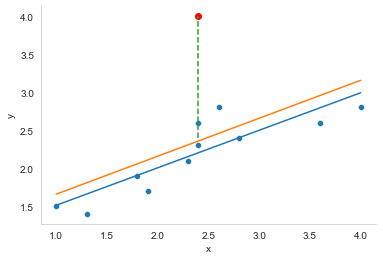

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns


df = pd.DataFrame(
    {'x': [1, 1.3, 1.8, 1.9, 2.4, 2.3, 2.4, 2.6, 2.8, 3.6, 4],
     'y': [1.5, 1.4, 1.9, 1.7, 2.3, 2.1, 2.6, 2.8, 2.4, 2.6, 2.8],
     'y2': [1.5, 1.4, 1.9, 1.7, 4, 2.1, 2.6, 2.8, 2.4, 2.6, 2.8]
    })



# fit linear regression model and save parameters
def func(x, a, b):
    return a * x + b

initialParameters = np.array([1.0, 1.0])

fittedParameters, pcov = curve_fit(func, df['x'], df['y'], initialParameters)

modelPredictions = func(df['x'], *fittedParameters) 

xModel = np.linspace(min(df['x']), max(df['x']))
yModel = func(xModel, *fittedParameters)


# plot data
fig = plt.figure() 
ax = fig.add_subplot()


sns.scatterplot(data = df, x='x', y='y')

# add regression line
ax.plot(xModel, yModel)


initialParameters = np.array([1.0, 1.0])

fittedParameters, pcov = curve_fit(func, df['x'], df['y2'], initialParameters)

modelPredictions = func(df['x'], *fittedParameters) 

xModel = np.linspace(min(df['x']), max(df['x']))
yModel = func(xModel, *fittedParameters)

ax.plot(xModel, yModel)
ax.plot(2.4, 4, 'ro')
ax.plot([2.4, 2.4], [2.4 ,4], linestyle='dashed')
ax.grid(False)

sns.despine()
plt.show()

 ```{glue:figure} outlier-fig
:figwidth: 600px
:name: fig-outlier

An illustration of outliers. The orange line plots the regression line estimated when the anomalous (red) data point is included, and the dotted line shows the residual for the outlier. The blue line shows the regression line that would have been estimated without the anomalous observation included. The outlier has an unusual value on the outcome (y axis location) but not the predictor (x axis location), and lies a long way from the regression line.

```

The second way in which an observation can be unusual is if it has high **_leverage_**: this happens when the observation is very different from all the other observations. This doesn't necessarily have to correspond to a large residual: if the observation happens to be unusual on all variables in precisely the same way, it can actually lie very close to the regression line. An example of this is shown in panel A of {numref}`fig-leverage-influence`. The leverage of an observation is operationalised in terms of its *hat value*, usually written $h_i$. The formula for the hat value is rather complicated[^notehatmatrix] but its interpretation is not: $h_i$ is a measure of the extent to which the $i$-th observation is "in control" of where the regression line ends up going. We won't bother extracting the hat values here, but if you want to do this, you can use the `get_influence` method from the `statsmodels.api` package to inspect the relative influence of data points. For now, it is enough to get an intuitive, visual idea of what leverage can mean.

[^notehatmatrix]: Again, for the linear algebra fanatics: the "hat matrix" is defined to be that matrix $H$ that converts the vector of observed values $y$ into a vector of fitted values $\hat{y}$, such that $\hat{y} = H y$. The name comes from the fact that this is the matrix that "puts a hat on $y$". The  hat *value* of the $i$-th observation is the $i$-th diagonal element of this matrix (so technically I should be writing it as $h_{ii}$ rather than $h_{i}$). Oh, and in case you care, here's how it's calculated: $H = X(X^TX)^{-1} X^T$. Pretty, isn't it?

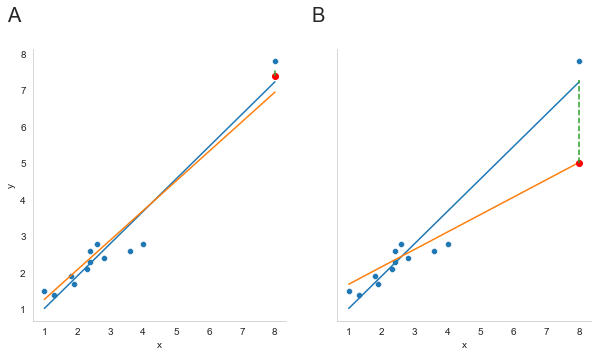

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
import string

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

df = pd.DataFrame(
    {'x': [1, 1.3, 1.8, 1.9, 2.4, 2.3, 2.4, 2.6, 2.8, 3.6, 4, 8],
     'y': [1.5, 1.4, 1.9, 1.7, 2.3, 2.1, 2.6, 2.8, 2.4, 2.6, 2.8, 7.8],
     'y2': [1.5, 1.4, 1.9, 1.7, 4, 2.1, 2.6, 2.8, 2.4, 2.6, 2.8, 7.4]
    })



# fit linear regression model and save parameters
def func(x, a, b):
    return a * x + b

initialParameters = np.array([1.0, 1.0])

fittedParameters, pcov = curve_fit(func, df['x'], df['y'], initialParameters)

modelPredictions = func(df['x'], *fittedParameters) 

xModel = np.linspace(min(df['x']), max(df['x']))
yModel = func(xModel, *fittedParameters)



sns.scatterplot(data = df, x='x', y='y', ax = axes[0])

# add regression line
axes[0].plot(xModel, yModel)


initialParameters = np.array([1.0, 1.0])

fittedParameters, pcov = curve_fit(func, df['x'], df['y2'], initialParameters)

modelPredictions = func(df['x'], *fittedParameters) 

xModel = np.linspace(min(df['x']), max(df['x']))
yModel = func(xModel, *fittedParameters)

axes[0].plot(xModel, yModel)
axes[0].plot(8, 7.4, 'ro')
axes[0].plot([8, 8], [7.4 ,7.6], linestyle='dashed')
axes[0].grid(False)

# Plot 2

df = pd.DataFrame(
    {'x': [1, 1.3, 1.8, 1.9, 2.4, 2.3, 2.4, 2.6, 2.8, 3.6, 4, 8],
     'y': [1.5, 1.4, 1.9, 1.7, 2.3, 2.1, 2.6, 2.8, 2.4, 2.6, 2.8, 7.8],
     'y2': [1.5, 1.4, 1.9, 1.7, 4, 2.1, 2.6, 2.8, 2.4, 2.6, 2.8, 5]
    })



# fit linear regression model and save parameters
def func(x, a, b):
    return a * x + b

initialParameters = np.array([1.0, 1.0])

fittedParameters, pcov = curve_fit(func, df['x'], df['y'], initialParameters)

modelPredictions = func(df['x'], *fittedParameters) 

xModel = np.linspace(min(df['x']), max(df['x']))
yModel = func(xModel, *fittedParameters)




sns.scatterplot(data = df, x='x', y='y', ax = axes[1])

# add regression line
axes[1].plot(xModel, yModel)


initialParameters = np.array([1.0, 1.0])

fittedParameters, pcov = curve_fit(func, df['x'], df['y2'], initialParameters)

modelPredictions = func(df['x'], *fittedParameters) 

xModel = np.linspace(min(df['x']), max(df['x']))
yModel = func(xModel, *fittedParameters)

axes[1].plot(xModel, yModel)
axes[1].plot(8, 5, 'ro')
axes[1].plot([8, 8], [5 ,7.3], linestyle='dashed')
axes[1].grid(False)


for n, ax in enumerate(axes):   
    ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20)


sns.despine()
plt.show()


 ```{glue:figure} leverage-influence-fig
:figwidth: 600px
:name: fig-leverage-influence

Outliers showing high leverage points (panel A) and high influence points (panel B).

```

In general, if an observation lies far away from the other ones in terms of the predictor variables, it will have a large hat value (as a rough guide, high leverage is when the hat value is more than 2-3 times the average; and note that the sum of the hat values is constrained to be equal to $K+1$). High leverage points are also worth looking at in more detail, but they're much less likely to be a cause for concern unless they are also outliers.

This brings us to our third measure of unusualness, the **_influence_** of an observation. A high influence observation is an outlier that has high leverage. That is, it is an observation that is very different to all the other ones in some respect, and also lies a long way from the regression line. This is illustrated in {numref}`fig-leverage-influence`, panel B. Notice the contrast to panel A, and to {numref}`fig-outlier`: outliers don't move the regression line much, and neither do high leverage points. But something that is an outlier and has high leverage... that has a big effect on the regression line.

That's why we call these points high influence; and it's why they're the biggest worry. We operationalise influence in terms of a measure known as **_Cook's distance_**, 

$$
D_i = \frac{{\epsilon_i^*}^2 }{K+1} \times \frac{h_i}{1-h_i}
$$ 

Notice that this is a multiplication of something that measures the outlier-ness of the observation (the bit on the 
left), and something that measures the leverage of the observation (the bit on the right). In other words, in order to have a large Cook's distance, an observation must be a fairly substantial outlier *and* have high leverage.

Again, if you want to quantify Cook's distance, this can be done using using `statsmodels.api`. I won't go through this in detail, but if you are interested, you can click to show the code, and see how I got the Cook's distance values from `statmodels`.

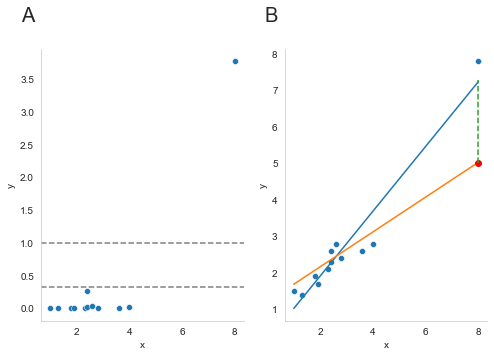

In [38]:
import seaborn as sns
import statsmodels.api as sm

# Define a figure with two panels
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Define our made-up data
df = pd.DataFrame(
    {'x': [1, 1.3, 1.8, 1.9, 2.4, 2.3, 2.4, 2.6, 2.8, 3.6, 4, 8],
     'y': [1.5, 1.4, 1.9, 1.7, 2.3, 2.1, 2.6, 2.8, 2.4, 2.6, 2.8, 7.8],
     'y2': [1.5, 1.4, 1.9, 1.7, 4, 2.1, 2.6, 2.8, 2.4, 2.6, 2.8, 5]
    })

# Get Cook's distance

# model the data using statsmodels.api OLS (ordinary least squares)
model = sm.OLS(df['y2'], df['x'])
results = model.fit()

# extract cook's distance
influence = results.get_influence()
cooks = influence.cooks_distance

# for plotting, make a dataframe with the x data, and the corresponding cook's distances
df_cooks = pd.DataFrame(
    {'x': df['x'],
     'y': cooks[0]
    })

# Panel A

# plot Cook's distance against the x data points
sns.scatterplot(data = df_cooks, x = 'x', y = 'y', ax = axes[0])
axes[0].axhline(y=1, color='gray', linestyle='--')
axes[0].axhline(y= 4/len(df['x']), color='gray', linestyle='--')



# Panel B (same as before)

df = pd.DataFrame(
    {'x': [1, 1.3, 1.8, 1.9, 2.4, 2.3, 2.4, 2.6, 2.8, 3.6, 4, 8],
     'y': [1.5, 1.4, 1.9, 1.7, 2.3, 2.1, 2.6, 2.8, 2.4, 2.6, 2.8, 7.8],
     'y2': [1.5, 1.4, 1.9, 1.7, 4, 2.1, 2.6, 2.8, 2.4, 2.6, 2.8, 5]
    })



# fit linear regression model and save parameters
def func(x, a, b):
    return a * x + b


# first regression line
initialParameters = np.array([1.0, 1.0])

fittedParameters, pcov = curve_fit(func, df['x'], df['y'], initialParameters)

modelPredictions = func(df['x'], *fittedParameters) 

xModel = np.linspace(min(df['x']), max(df['x']))
yModel = func(xModel, *fittedParameters)


# plot data points
sns.scatterplot(data = df, x='x', y='y', ax = axes[1])

# plot first regression line
axes[1].plot(xModel, yModel)


# second regression line

initialParameters = np.array([1.0, 1.0])

fittedParameters, pcov = curve_fit(func, df['x'], df['y2'], initialParameters)

modelPredictions = func(df['x'], *fittedParameters) 

xModel = np.linspace(min(df['x']), max(df['x']))
yModel = func(xModel, *fittedParameters)

axes[1].plot(xModel, yModel)

# add red point to show "outlier"
axes[1].plot(8, 5, 'ro')

# add dashed line to show change in residual
axes[1].plot([8, 8], [5 ,7.3], linestyle='dashed')
axes[1].grid(False)

# add letter labels
for n, ax in enumerate(axes):   
    ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20)

# prettify
sns.despine()
for ax in axes:
    ax.grid(False)
plt.show()

 ```{glue:figure} cooks-fig
:figwidth: 600px
:name: fig-cooks

A visualization of Cook's distance as a means for identifying the influence of each data point. Panel B is the same as panel B in {numref}`fig-leverage-influence` above. The red dot show the effect on the entire regression line that sinking the final point from 7.4 to 5 has. Panel A shows Cook's distance for the data set in which the data point at x = 8 is 5 (the orange line). The dashed lines show two possible cutoff points for a "large" Cook's distance: either 1 or 4/N, in which N is the number of data points.

```

As a rough guide, Cook's distance greater than 1 is often considered large (that's what I typically use as a quick and dirty rule), though a quick scan of the internet and a few papers suggests that $4/N$ has also been suggested as a possible rule of thumb. As the visualization in {numref}`fig-cooks` illustrates, the red data point at x = 8 has a large Cook's distance.

An obvious question to ask next is, if you do have large values of Cook's distance, what should you do? As always, there's no hard and fast rules. Probably the first thing to do is to try running the regression with that point excluded and see what happens to the model performance and to the regression coefficients. If they really are substantially different, it's time to start digging into your data set and your notes that you no doubt were scribbling as your ran your study; try to figure out *why* the point is so different. If you start to become convinced that this one data point is badly distorting your results, you might consider excluding it, but that's less than ideal unless you have a solid explanation for why this particular case is qualitatively different from the others and therefore deserves to be handled separately.[^noterobust] To give an example, let's delete the observation from day 64, the observation with the largest Cook's distance for the `mod2` model, where we predicted my grumpiness on the basis of my sleep, and my baby's sleep.

[^noterobust]: An alternative is to run a "robust regression"; I might discuss robust regression in a later version of this book, but I don't promise.

First, let's get back to the original sleep data, and remind ourselves of what our model coefficients looked like:

In [39]:
import pandas as pd
import pingouin as pg

file = 'https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/parenthood.csv'
df = pd.read_csv(file)

predictors = df[['dan_sleep', 'baby_sleep']]
outcome = df['dan_grump']

mod2 = pg.linear_regression(predictors, outcome)
mod2.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,125.97,3.04,41.42,0.00,0.82,0.81,119.93,132.00
1,dan_sleep,-8.95,0.55,-16.17,0.00,0.82,0.81,-10.05,-7.85
2,baby_sleep,0.01,0.27,0.04,0.97,0.82,0.81,-0.53,0.55


Then, we can remove the data from day 64, using the `drop()` method from `pandas`. Remember, as always, it's Python, and Python is zero-indexed, so it starts counting the days at 0 and not 1, and that means that day 64 is on row 63!

In [40]:
df_2 = df.drop(63)

In [41]:
predictors = df_2[['dan_sleep', 'baby_sleep']]
outcome = df_2['dan_grump']

mod3 = pg.linear_regression(predictors, outcome)
mod3.round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,126.36,3.00,42.19,0.00,0.82,0.82,120.41,132.30
1,dan_sleep,-8.83,0.55,-16.13,0.00,0.82,0.82,-9.91,-7.74
2,baby_sleep,-0.13,0.28,-0.48,0.63,0.82,0.82,-0.68,0.41


As you can see, those regression coefficients have barely changed in comparison to the values we got earlier. In other words, we really don't have any problem as far as anomalous data are concerned.

(regressionnormality)=
### Checking the normality of the residuals

Like many of the statistical tools we've discussed in this book, regression models rely on a normality assumption. In this case, we assume that the residuals are normally distributed. The tools for testing this aren't fundamentally different to those that we discussed [earlier](shapiro). First, I firmly believe that it never hurts to draw a good old-fashioned histogram:

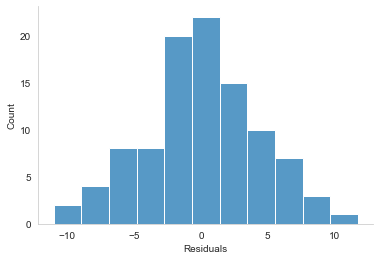

In [42]:
import pandas as pd
import pingouin as pg
import seaborn as sns

predictors = df[['dan_sleep', 'baby_sleep']]
outcome = df['dan_grump']

mod2 = pg.linear_regression(predictors, outcome)

res = mod2.residuals_
res = pd.DataFrame(res, columns = ['Residuals'])

fig = plt.figure()

ax = sns.histplot(data = res, x = 'Residuals')
ax.grid(False)
sns.despine()
plt.show()

 ```{glue:figure} res-hist-fig
:figwidth: 600px
:name: fig-res-hist

A histogram of the (ordinary) residuals in the `mod2` model. These residuals look very close to being normally distributed, much moreso than is typically seen with real data. This shouldn’t surprise you... they aren’t real data, and they aren’t real residuals!

```

The resulting plot is shown in {numref}`fig-res-hist`, and as you can see the plot looks pretty damn close to normal, almost unnaturally so. I could also run a Shapiro-Wilk test to check, using the `normality` function from `pingouin`:

In [43]:
sw = pg.normality(res, method = 'shapiro')
sw.round(2)

,W,pval,normal
Residuals,0.99,0.84,True


The W value of .99, at this sample size, is non-significant ($p$ = .82), again suggesting that the normality assumption isn’t in any danger here. As a third measure, we might also want to draw a QQ-plot. This can be most easily done using the `qqplot` function from `statsmodels.api`:

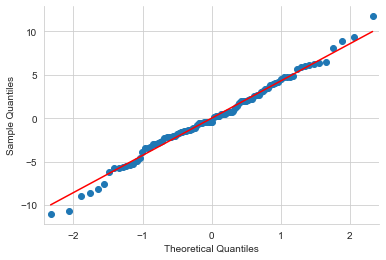

In [44]:
import statsmodels.api as sm


sm.qqplot(res['Residuals'], line = 's')
sns.despine()


 ```{glue:figure} qq-fig
:figwidth: 600px
:name: fig-qq

A Q-Q (quantile-quantile) plot, the theoretical quantiles according to the model, against the quantiles of the standardised residuals.

```

If our residuals were _perfectly_ normally distributed, then they would lie right on the red line. These residuals veer off a little at the ends, but again, pretty damn close, so the Q-Q plot further confirms our conviction based on the histogram and the Shapiro-Wilk test, that it is appropriate to model these data with a linear regression.

A little note: Q-Q plots are often created by plotting the quantiles of the _standardized_ residuals against the theoretical quantiles. Since using Q-Q plots for assessing normality is basically a matter of squinting at the plot at getting a _feeling_, based on your great experience of squinting at plots, for whether the data _seem_ normal enough, it probably doesn't matter so much which way you do it. Below you can see a side-by-side comparison of a Q-Q plot of the ordinary (left) and standardized (right) residuals. Honestly, they look about the same to me, and you can get the ordinary residuals straight from `pingouin`, without needing to invoke `statsmodels`.

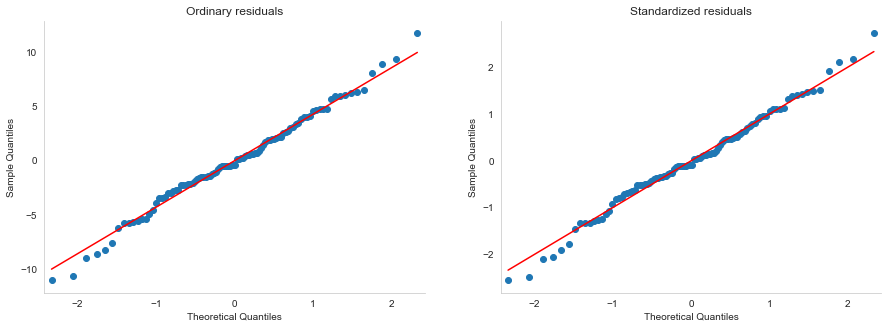

In [45]:
# Define a figure with two panels
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

res_standard = pd.DataFrame(res_standard, columns = ['Standardized_Residuals'])

sm.qqplot(res['Residuals'], line = 's', ax = axes[0])
sm.qqplot(res_standard['Standardized_Residuals'], line = 's', ax = axes[1])

axes[0].set_title('Ordinary residuals')
axes[1].set_title('Standardized residuals')

for ax in axes:
    ax.grid(False)

sns.despine()

(regressionlinearity)=
### Checking the linearity of the relationship

The third thing we might want to test is the linearity of the relationships between the predictors and
the outcomes. There’s a few different things that you might want to do in order to check this. Firstly, it
never hurts to just plot the relationship between the fitted values $\hat{Y}_i$ and the observed values $Y_i$ for the
outcome variable, as illustrated in {numref}`fig-fitted_v_observed`.

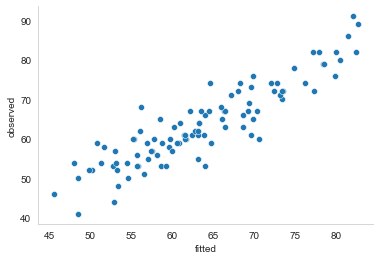

In [46]:
predictors = df[['dan_sleep', 'baby_sleep']]
outcome = df['dan_grump']

mod2 = pg.linear_regression(predictors, outcome, as_dataframe = False)

df_res_pred = pd.DataFrame(
    {'observed': outcome,
     'fitted': mod2['pred']
    })

fig = plt.figure()

ax=sns.scatterplot(data = df_res_pred, x = 'fitted', y = 'observed')
ax.grid(False)
sns.despine()
plt.show()

 ```{glue:figure} fitted_v_observed-fig
:figwidth: 600px
:name: fig-fitted_v_observed

Plot of the fitted values against the observed values of the outcome variable. A straight line is what we’re hoping to see here. This looks pretty good, suggesting that there’s nothing grossly wrong, but there could be hidden subtle issues.

```



One of the reasons I like to draw these plots is that they give you a kind of “big picture view”. If this plot looks approximately linear, then we’re probably not doing too badly (though that’s not to say that there aren’t problems). However, if you can see big departures from linearity here, then it strongly suggests that you need to make some changes.

In any case, in order to get a more detailed picture it’s often more informative to look at the relationship between the fitted values and the residuals themselves. Let's take a look. Here, we use the `residplot` function from `seaborn`, and in addition to drawing a straight line through all the points, we can ask Python to compute a "locally-weighed linear linear" regression, by setting the argument `lowess` to `True`. This gives us a sort of moving window, as Python fits a series of little regressions as it moves through the data. With a little work, we can also use ``regplot`` to produce the same figure for the multiple linear regression model with both ``dan_sleep`` and ``baby_sleep`` as predictors (click the show button to see how). If the relationship in our data is truly linear, then we should see a straight, perfectly horizontal line. There’s some hint of curvature here, but it’s not clear whether or not we be concerned. 

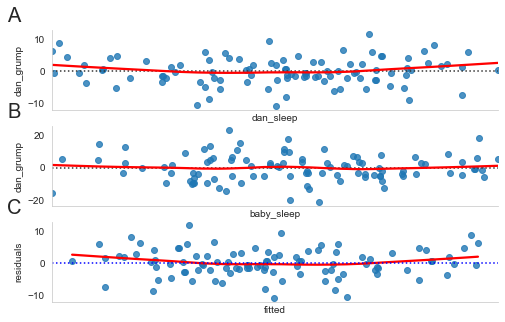

In [47]:
# Define a figure with two panels
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(8, 5))

# Fit linear regressions for both predictors, and plot residuals

p1=sns.residplot(data=df, x='dan_sleep', y='dan_grump', lowess=True, line_kws=dict(color="r"), ax=axes[0])
p2=p3=sns.residplot(data=df, x='baby_sleep', y='dan_grump', lowess=True, line_kws=dict(color="r"), ax=axes[1])


# Add panel for multiple linear regression

df_res_pred['residuals'] = mod2['residuals']


p3=sns.regplot(data = df_res_pred, x = 'fitted', y = 'residuals', lowess = True, line_kws=dict(color="r"), ax=axes[2])

plt.axhline(y=0, color='b', linestyle='dotted')

# Make figures look nicer
for n, ax in enumerate(axes):
    ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20)
    ax.grid(False)
    sns.despine()

subplots=[p1,p2,p3]
for p in subplots:
    p.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


# Plot figure in book, with caption
plt.show()


 ```{glue:figure} resid1-fig
:figwidth: 600px
:name: fig-resid1

Scatterplots of the residuals when a linear regression is fit separately for either ``dan_sleep`` as a predictor (panel A) or ``baby_sleep`` as a predictor (panel B). Panel C plots the residuals for the overall fit of the model including both predictors. The dotted horizontal line represents the fitted regression model. If a linear model is appropriate for our data, then the points should lie evenly above and below the dotted line, the whole away along the x-axis. The red line shows a locally-weighted smoothing of the regressionn line. Too much curvature in this line would suggest that maybe a straight line is not the best model for our data. But how much curvature is too much?

```




One method for testing the degree of curvature is known as Tukey's test for nonadditivity {cite:`tukey1949one, fox2018r`}. The test is quite simple: you just take the fitted (predicted) values from your original model, square them, and then include these squared fitted values as a predictor when you re-run the model. If the $t$-test for the new predictor comes up significant, this implies that there is some nonlinear relationship between the variable and the residuals. Let's give this a try:

In [48]:
# square the fitted values for our model, and add them to our dataframe
df['Tukey'] = mod2['pred']**2

#re-run the model, with squared fitted values added as predictor (here I have called them "Tukey")
mod_curve_check = pg.linear_regression(df[['dan_sleep', 'baby_sleep', 'Tukey']], df['dan_grump'])
mod_curve_check.round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,1.540,57.642,0.027,0.979,0.825,0.819,-112.878,115.958
1,dan_sleep,2.867,5.494,0.522,0.603,0.825,0.819,-8.039,13.773
2,baby_sleep,0.011,0.266,0.043,0.966,0.825,0.819,-0.517,0.540
3,Tukey,0.010,0.005,2.162,0.033,0.825,0.819,0.001,0.020


Since the $t$-test on the coefficients for new ``Tukey`` predictor is significant ($p$ < 0.05), this suggests that the curvature we see in {numref}`fig-resid1` is genuine, although it still bears remembering that the pattern in {numref}`fig-fitted_v_observed` is pretty damn straight: in other words the deviations from linearity are fairly small, and probably not worth worrying about.

In a lot of cases, the solution to this problem (and many others) is to transform one or more of the variables. We have already discussed the [basics of variable transformation](transform), but I do want to make special note of one additional possibility that I didn't mention earlier: the Box-Cox transform. The Box-Cox function is a fairly simple one, but it's very widely used 

$$
f(x,\lambda) = \frac{x^\lambda - 1}{\lambda}
$$

for all values of $\lambda$ except $\lambda = 0$. When $\lambda = 0$ we just take the natural logarithm (i.e., $\ln(x)$). You can calculate it using the ``boxcox`` function from ``scipy.stats``, which will automatically calculate the optimal value of $\lambda$. In the case of our ``dan_sleep`` data though, the data were already pretty normally distributed (panel A), so applying the transformation (panel B) really doesn't do much. Now, if only the _quality_ of my sleep could be transformed, and not just the _distribution_, ah, then we would really be on to something!

Optimal value for lambda: 1.7912772737277842


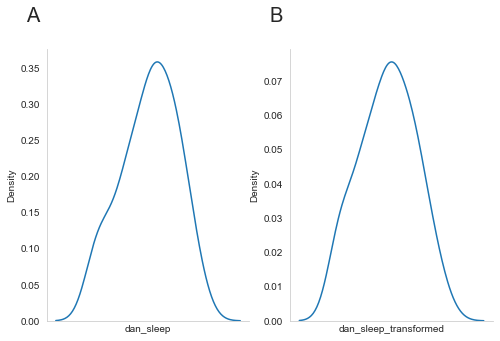

In [49]:
from scipy.stats import boxcox

df['dan_sleep_transformed'], best_lambda = boxcox(df['dan_sleep'])

# Define a figure with two panels
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(8, 5))

# Fit linear regressions for both predictors, and plot residuals

p1=sns.kdeplot(df['dan_sleep'], ax=axes[0])
p2=sns.kdeplot(df['dan_sleep_transformed'], ax=axes[1])

# Make figures look nicer
for n, ax in enumerate(axes):
    ax.text(-0.1, 1.1, string.ascii_uppercase[n], transform=ax.transAxes, 
            size=20)
    ax.grid(False)
    sns.despine()

subplots=[p1,p2,p3]
for p in subplots:
    p.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

print('Optimal value for lambda:', best_lambda)


# Plot figure in book, with caption
plt.show()

 ```{glue:figure} boxcox-fig
:figwidth: 600px
:name: fig-boxcox

Distribution for the raw ``dan_sleep`` data (panel A) and the distribution same data after a Box-Cox transformation (panel B). In this case, the transformation has not had much of an effect, as the data were reasonably normally-distributed to begin with.

```


(regressionhomogeneity)=
### Checking the homogeneity of variance

The regression models that we've talked about all make a homogeneity of variance assumption: the variance of the residuals is assumed to be constant. One way to inspect this visually is to use a "Scale-Location Plot", which is just a variation on the plots we made in {numref}`fig-resid1`. In a Scale-Location Plot, instead of plotting the fitted values against the raw residuals, we plot them against the square root of the absolute value of the standardized residuals, which can make it easier to visually assess the homogeneity of the variance.

As far as I know (and admittedly, that's not so far), there is no ready-made package in Python that will produce a Scale-Location Plot, but if you have made it this far in the book, you already have the knowledge to build on of these yourself. It could go something like this:

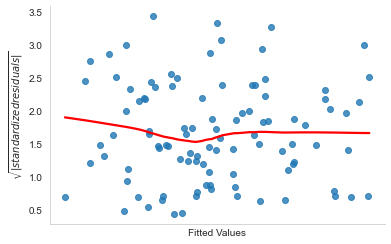

In [50]:

predictors = df[['dan_sleep', 'baby_sleep']]
outcome = df['dan_grump']

mod2 = pg.linear_regression(predictors, outcome, as_dataframe = False)

df_slplot = pd.DataFrame(
    {'fitted': mod2['pred'],
     'sqrt_abs_stand_res': np.sqrt(np.abs(mod2['residuals']))
    })

fig = plt.figure()

ax=sns.regplot(data = df_slplot, x = 'fitted', y = 'sqrt_abs_stand_res', lowess = True, line_kws=dict(color="r"))

# Make figures look nicer
ax.set_ylabel(r'$\sqrt{|standardized residuals|}$')
ax.set_xlabel('Fitted Values')
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax.grid(False)
sns.despine()

plt.show(fig)

 ```{glue:figure} sl-plot-fig
:figwidth: 600px
:name: fig_sl-plot

Plot of the fitted values (model predictions) against the square root of the abs standardised residuals. This plot is used to diagnose violations of homogeneity of variance. If the variance is really constant, then the line through the middle should be horizontal and flat.

```


A slightly more formal approach is to run a hypothesis test such as the Breusch–Pagan test {cite}`breusch1979simple`. Unfortunately, to run the test, we'll have to leave the cozy world of `pingouin` and use `statsmodels` instead, but luckily the code is not complicated. Basically, we just run our regression in `statsmodels` instead of `pinguoin`, and then run the Breusch-Pagan test on the output (see below). I won't go into how it works, other than to say that after we fit our regression model, we then fit _another_ regression model in which we use our predicted values to predict our residuals. We then use something called the "Lagrange multiplier statistic" (similar to a $x^2$ test) to check the significance of our new model. If the new model is not significant, this can be used to support the assumption that we are indeed dealing with a relationship that can be modelled linearly.

In [51]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

# fit our regression model using statsmodels
fit = smf.ols('dan_grump ~ dan_sleep+baby_sleep', data=df).fit()

bptest=sms.diagnostic.het_breuschpagan(fit.resid, fit.model.exog)

print('Lagrange multiplier statistic:', bptest[0])
print('p:', bptest[1])




Lagrange multiplier statistic: 0.488683161455461
p: 0.7832200556890268


We see that our original impression was right: there’s no violations of homogeneity of variance in this data.

It’s a bit beyond the scope of this chapter to talk too much about how to deal with violations of homogeneity of variance, but I’ll give you a quick sense of what you need to consider. The main thing to worry about, if homogeneity of variance is violated, is that the standard error estimates associated with the regression coefficients are no longer entirely reliable, and so your $t$-tests for the coefficients aren’t quite right either. A simple fix to the problem is to make use of a “heteroscedasticity corrected covariance matrix” when estimating the standard errors. 

Again, this goes beyond what we can do with `pingouin`, but `statmodels` can get us there. Before I show you how, let's just re-assure ourselves that both `pingouin` and `statsmodels` are doing the same basic calculations when we fit our regression models. We'll start by re-running our mulitiple regression with `pingouin`, but I'll bump up the number of decimal places that we round our answer to, so that it is easier to compare with the `statsmodels` output:

In [52]:
predictors = df[['dan_sleep', 'baby_sleep']]
outcome = df['dan_grump']

mod2 = pg.linear_regression(predictors, outcome)
mod2.round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,125.9656,3.0409,41.4231,0.0000,0.8161,0.8123,119.9301,132.0010
1,dan_sleep,-8.9502,0.5535,-16.1715,0.0000,0.8161,0.8123,-10.0487,-7.8518
2,baby_sleep,0.0105,0.2711,0.0388,0.9691,0.8161,0.8123,-0.5275,0.5485


Next, we'll fit the same model, but using `statsmodels` instead:

In [53]:
smf.ols('dan_grump ~ dan_sleep+baby_sleep', data=df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dan_grump   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     215.2
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           2.15e-36
Time:                        22:34:36   Log-Likelihood:                -287.48
No. Observations:                 100   AIC:                             581.0
Df Residuals:                      97   BIC:                             588.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    125.9656      3.041     41.423      0.000     119.930     132.001
dan_sleep     -8.9502      0.553    -16.172      0.000     -10.049      -7.852
baby_sleep     0.0105      0.271      0.039      0.969      -0.527       0.549
==============================================================================
Omnibus:                        0.593   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.743   Jarque-Bera (JB):                0.218
Skew:                          -0.053   Prob(JB):                        0.897
Kurtosis:                       3.203   Cond. No.                         76.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Of course, `statsmodels` gives us way more information than `pingouin`, but if you hunt around in the output for the key things we are used to talking about (the coefficients for `dan_sleep` and `baby_sleep`, the t-values, the $R^2$ and adjusted $R^2$, etc.) it's all pretty much the same, right?

Good. Now, we'll re-fit our regression model, but ask `statmodels` to take the potential non-homogeneity (aka the heteroskedasticity) of variance in our model into account by specifying a ``cov_type``, that is, the type of "robust sandwich estimator" we want to use. Yes. It really is called a "robust sandwich estimator". I'm not even kidding.[^sandwich]

[^sandwich]: Again, a footnote that should be read only by the two readers of this book that love linear algebra (mmmm... I love the smell of matrix computations in the morning; smells like... nerd). In these estimators, the covariance matrix for $b$ is given by $(X^T X)^{-1}\  X^T \Sigma X \ (X^T X)^{-1}$. See, it's a "sandwich"? Assuming you think that  $(X^T X)^{-1} = \mbox{"bread"}$ and  $X^T \Sigma X = \mbox{"filling"}$, that is. Which of course everyone does, right? In any case, the usual estimator is what you get when you set $\Sigma = \hat\sigma^2 I$. But there are others. For instance, the corrected version that I learned originally uses $\Sigma = \mbox{diag}(\epsilon_i^2)$ {cite}`White1980`. `statsmodels` gives you a choice of four different sandwich estimators you can use, but not (at least that I can find today on June 21 2023) a lot of information on what they actually are, or references for where they come from, so if you _really_ need this information, you'll have to do your own digging. Sorry.

In [54]:
smf.ols('dan_grump ~ dan_sleep+baby_sleep', data=df).fit(cov_type='HC1').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dan_grump   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     201.7
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           2.78e-35
Time:                        22:34:36   Log-Likelihood:                -287.48
No. Observations:                 100   AIC:                             581.0
Df Residuals:                      97   BIC:                             588.8
Df Model:                           2                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    125.9656      3.149     39.996      0.000     119.793     132.138
dan_sleep     -8.9502      0.597    -14.987      0.000     -10.121      -7.780
baby_sleep     0.0105      0.282      0.037      0.970      -0.541       0.563
==============================================================================
Omnibus:                        0.593   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.743   Jarque-Bera (JB):                0.218
Skew:                          -0.053   Prob(JB):                        0.897
Kurtosis:                       3.203   Cond. No.                         76.9
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

Not surprisingly, the $z$-values are pretty similar to the $t$-values that we saw when we fit our basic, non-robust regression, because the homogeneity of variance assumption wasn’t violated in our data anyway. But if it had been, we might have seen some more substantial differences.

(regressioncollinearity)=
### Checking for collinearity

The last kind of regression diagnostic that I'm going to discuss in this chapter is the use of **_variance inflation factors_** (VIFs), which are useful for determining whether or not the predictors in your regression model are too highly correlated with each other. There is a variance inflation factor associated with each predictor $X_k$ in the model, and the formula for the $k$-th VIF is:

$$
\mbox{VIF}_k = \frac{1}{1-{R^2_{(-k)}}}
$$

where $R^2_{(-k)}$ refers to $R$-squared value you would get if you ran a regression using $X_k$ as the outcome variable, and all the other $X$ variables as the predictors. The idea here is that $R^2_{(-k)}$ is a very good measure of the extent to which $X_k$ is correlated with all the other variables in the model. Better yet, the square root of the VIF is pretty interpretable: it tells you how much wider the confidence interval for the corresponding coefficient $b_k$ is, relative to what you would have expected if the predictors are all nice and uncorrelated with one another. If you've only got two predictors, the VIF values are always going to be the same, as we can see if we use the ``variance_inflation_factor`` function from ``statsmodels``.

First, we need a dataframe with our predictor variables as columns, plus a column with a constant value representing the model intercept:

In [55]:
matrix = pd.DataFrame({'Intercept': [1]*len(df['dan_sleep']),
                       'dan_sleep': df['dan_sleep'], 
                       'baby_sleep': df['baby_sleep']})
matrix.head()


,Intercept,dan_sleep,baby_sleep
0,1,7.59,10.18
1,1,7.91,11.66
2,1,5.14,7.92
3,1,7.71,9.61
4,1,6.68,9.75


Then, we can calculate the VIF for each predictor and put the results in a dataframe:

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(matrix.values, i) for i in range(matrix.shape[1])]
vif['variable'] = matrix.columns
vif


,VIF,variable
0,48.784569,Intercept
1,1.651038,dan_sleep
2,1.651038,baby_sleep


And since the square root of 1.65 is 1.28, which isn't really a huge change in the confidence intervals for our predictors, we see that the correlation between our two predictors isn’t causing much of a problem.

To give a sense of how we could end up with a model that has bigger collinearity problems, suppose I were to run a much less interesting regression model, in which I tried to predict the day on which the data were collected, as a function of all the other variables in the data set. To see why this would be a bit of a problem, let’s have a look at the correlation matrix for all four variables:

In [57]:
df.corr()

,dan_sleep,baby_sleep,dan_grump,day,Tukey,dan_sleep_transformed
dan_sleep,1.000000,0.627949,-0.903384,-0.098408,-0.997024,0.997866
baby_sleep,0.627949,1.000000,-0.565964,-0.010434,-0.626177,0.625397
dan_grump,-0.903384,-0.565964,1.000000,0.076479,0.907817,-0.895394
day,-0.098408,-0.010434,0.076479,1.000000,0.103952,-0.093393
Tukey,-0.997024,-0.626177,0.907817,0.103952,1.000000,-0.989864
dan_sleep_transformed,0.997866,0.625397,-0.895394,-0.093393,-0.989864,1.000000


We have some fairly large correlations between some of our predictor variables! When we run the regression model and look at the VIF values, we see that the collinearity is causing a lot of uncertainty about the coefficients. First, we'll add the ``day`` column and the ``dan_grump`` column to our ``matrix`` dataframe...

In [58]:
matrix['dan_grump'] = df['dan_grump']
matrix['day'] = df['day']


matrix.head()

,Intercept,dan_sleep,baby_sleep,dan_grump,day
0,1,7.59,10.18,56,1
1,1,7.91,11.66,60,2
2,1,5.14,7.92,82,3
3,1,7.71,9.61,55,4
4,1,6.68,9.75,67,5


and then, we'll look at the VIFs...

In [59]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(matrix.values, i) for i in range(matrix.shape[1])]
vif['variable'] = matrix.columns
vif

,VIF,variable
0,922.960321,Intercept
1,6.148528,dan_sleep
2,1.658389,baby_sleep
3,5.442617,dan_grump
4,1.015119,day


Yep, that’s some mighty fine collinearity you’ve got there. Of course, if you suspect that your model might have some degree of collinearity between predictors, you are still left with some questions to which there are no concrete answers (sorry!). How much collinearity is ok? What should I do about the collinearity in my model? There are some suggestions and guidelines out there (e.g., in the ``statsmodels`` documentation, a vif of 5 is suggested to be the limit, but [elsewhere](https://en.wikipedia.org/wiki/Variance_inflation_factor) you can find other suggested values as cutoff lines), but like so many things in statistics (and in life), I'm afraid you will need to exercise your own judgment.

(modelselreg)=
## Model Selection 

One fairly major problem that remains is the problem of "model selection". That is, if we have a data set that contains several variables, which ones should we include as predictors, and which ones should we not include? In other words, we have a problem of **_variable selection_**. In general, model selection is a complex business, but it's made somewhat simpler if we restrict ourselves to the problem of choosing a subset of the variables that ought to be included in the model. Nevertheless, I'm not going to try covering even this reduced topic in a lot of detail. Instead, I'll talk about two broad principles that you need to think about; and then discuss one concrete tool to help you select a subset of variables to include in your model. Firstly, the two principles:

- It's nice to have an actual substantive basis for your choices. That is, in a lot of situations you the researcher have good reasons to pick out a smallish number of possible regression models that are of theoretical interest; these models will have a sensible interpretation in the context of your field. Never discount the importance of this. Statistics serves the scientific process, not the other way around. 
- To the extent that your choices rely on statistical inference, there is a trade off between simplicity and goodness of fit. As you add more predictors to the model, you make it more complex; each predictor adds a new free parameter (i.e., a new regression coefficient), and each new parameter increases the model's capacity to "absorb" random variations. So the goodness of fit (e.g., $R^2$) continues to rise as you add more predictors no matter what. If you want your model to be able to generalise well to new observations, you need to avoid throwing in too many variables. 

This latter principle is often referred to as **_Ockham's razor_**, and is often summarised in terms of the following pithy saying: *do not multiply entities beyond necessity*. In this context, it means: don't chuck in a bunch of largely irrelevant predictors just to boost your $R^2$. Hm. Yeah, the original was better. 

In any case, what we need is an actual mathematical criterion that will implement the qualitative principle behind Ockham's razor in the context of selecting a regression model. As it turns out there are several possibilities. The one that I'll talk about is the **_Akaike information criterion_** {cite}``Akaike1974`` simply because it's a common one, and because ``statsmodels`` will calculate it for you automatically when you run a linear regression There are many others, including BIC (Bayesian Information Criterion), which ``statsmodels`` also gives you for free. In the context of a linear regression model (and ignoring terms that don't depend on the model in any way!), the AIC for a model that has $K$ predictor variables plus an intercept is:

$$
\mbox{AIC} = \displaystyle\frac{\mbox{SS}_{res}}{\hat{\sigma}}^2+ 2K
$$


The smaller the AIC value, the better the model performance is.[^AIC_calc] If we ignore the low level details, it's fairly obvious what the AIC does: on the left we have a term that increases as the model predictions get worse; on the right we have a term that increases as the model complexity increases. The best model is the one that fits the data well (low residuals; left hand side) using as few predictors as possible (low $K$; right hand side). In short, this is a simple implementation of Ockham's razor. 



[^AIC_calc]: Note, depending on exactly how AIC is calculated, the actual AIC value may be different. That is, if you calculate AIC using the formula above, a Python function, or an algorithm from some other statistics software. However, if you use the same method to calculate AIC for two different models, and take the differnce between them, then this should end up being the same, no matter what method was used. In practice, this is all you care about: the actual value of an AIC statistic isn't very informative, but the differences between two AIC values *are* useful, since these provide a measure of the extent to which one model outperforms another.

### Backward elimination

Okay, let’s have a look at how this works in practice. In this example I’ll keep it simple and use only the basic backward elimination approach. That is, start with the complete regression model, including all possible predictors. Then, at each “step” we try all possible ways of removing one of the variables, and whichever of these is best (in terms of lowest AIC value) is accepted. This becomes our new regression model; and we then try all possible deletions from the new model, again choosing the option with lowest AIC. This process continues until we end up with a model that has a lower AIC value than any of the other possible models that you could produce by deleting one of its predictors. Let’s see this in action. First, I need to define the model from which the process starts.

In [60]:
mod_full = smf.ols('dan_grump ~ dan_sleep + baby_sleep + day', data=df)

We can get ``statsmodels`` to fit the model and return a summay, which will include the AIC value.

In [61]:
mod_full.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              dan_grump   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     142.2
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           3.42e-35
Time:                        22:34:36   Log-Likelihood:                -287.43
No. Observations:                 100   AIC:                             582.9
Df Residuals:                      96   BIC:                             593.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    126.2787      3.242     38.945      0.000     119.842     132.715
dan_sleep     -8.9693      0.560    -16.016      0.000     -10.081      -7.858
baby_sleep     0.0157      0.273      0.058      0.954      -0.526       0.558
day           -0.0044      0.015     -0.288      0.774      -0.035       0.026
==============================================================================
Omnibus:                        0.599   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.215
Skew:                          -0.037   Prob(JB):                        0.898
Kurtosis:                       3.215   Cond. No.                         441.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 This is great, but we will be doing this several times, and this is quite a lot of information to wade through just to get AIC value. So to reduce the output, we could write a function, like the one below, to return _only_ the AIC value.

In [62]:
# function to return only the AIC calculation for a statsmodels linear model
def get_aic(model_name, model):
    aic = model.fit().summary().tables[0].as_text().split('\n')[7].split('AIC:')[1].strip()
    output = model_name + ' AIC: ' + aic
    return output

The line in this function that defines the variable ``aic`` looks pretty hairly, but that is only because I have compressed it down to one line. If you break it down, and try running it bit by bit (adding the parts with a `.` in front of them and looking at the output), you will see that doesn't really involve anything new (other than maybe the ``strip()`` function, which just removes unnecessary whitespace from the output)

Now we just give the function a name for the model, and the model itself, and it tells us the AIC:

In [63]:
get_aic('full model', mod_full)

'full model AIC: 582.9'

Now we can use our fancy new function to loop through all the possible models, each one removing one predictor from the full model:

In [64]:
mod_full = smf.ols('dan_grump ~ dan_sleep + baby_sleep + day', data=df)
mod_no_day = smf.ols('dan_grump ~ dan_sleep + baby_sleep', data=df)
mod_no_baby = smf.ols('dan_grump ~ dan_sleep + day', data=df)
mod_no_dan = smf.ols('dan_grump ~ baby_sleep + day', data=df)

models = [mod_full, mod_no_day, mod_no_baby, mod_no_dan]
names = ['Full Model', 'No Day', 'No Baby', 'No Dan']

aics = []
for n, model in enumerate(models):
    aics.append(get_aic(names[n], model))

aics

['Full Model AIC: 582.9',
 'No Day AIC: 581.0',
 'No Baby AIC: 580.9',
 'No Dan AIC: 710.9']

Of these models, the one in which we removed ``baby_sleep`` as a predictor has the lowest AIC, so it seems like removing this predictor is probably a good idea. This shouldn't be surprising, really, given all the other checks we have already done on these data. But let's proceed. Now, we can do the same thing again, but comparing only models without ``baby_sleep``:

In [65]:
mod_full = smf.ols('dan_grump ~ dan_sleep + day', data=df)
mod_no_day = smf.ols('dan_grump ~ dan_sleep', data=df)
mod_no_dan = smf.ols('dan_grump ~ day', data=df)

models = [mod_full, mod_no_day, mod_no_dan]
names = ['Full Model', 'No Day', 'No Dan']

aics = []
for n, model in enumerate(models):
    aics.append(get_aic(names[n], model))

aics

['Full Model AIC: 580.9', 'No Day AIC: 579.0', 'No Dan AIC: 747.7']

Now, the model in which we removed ``day`` as a predictor performs best (has the lowest AIC), so the next step would be to remove ``day`` from our model. In this case, that only leaves us with one predictor: ``dan_sleep``. Which is (perhaps not all that surprisingly) the mod1 that we started with at the [beginning of the chapter](pingouinregression): 

    mod1 = pg.linear_regression(df['dan_sleep'], df['dan_grump'])


This process, as I have described it, is fairly straightforward, especially once you a function to just grab the AIC from the ``statsmodels`` output. But if you find yourself doing this sort of thing often, you might want to automate it even further. It wouldn't take _that_ much work to expand on the code I have given you, and build a function that takes as input your full model, and then _automatically_ considers all possible variations, and continues eliminating predictors until it finds the optimal model. But this I leave as a programming exercise for you, if you feel so inclined.

### A caveat

Automated variable selection methods are seductive things. They provide an element of objectivity to your model selection, and that’s kind of nice. Unfortunately, they’re sometimes used as an excuse for thoughtlessness. No longer do you have to think carefully about which predictors to add to the model and what the theoretical basis for their inclusion might be... everything is solved by the magic of AIC. And if we start throwing around phrases like Ockham’s razor, well, it sounds like everything is wrapped up in a nice neat little package that no-one can argue with.

Or, perhaps not. Firstly, there’s very little agreement on what counts as an appropriate model selection criterion. When I was taught backward elimination as an undergraduate, we used F-tests to do it, because that was the default method used by the software. Here we are using AIC, and since this is an introductory text that’s the only method I’ve described, but the AIC is hardly the Word of the Gods of Statistics. It’s an approximation, derived under certain assumptions, and it’s guaranteed to work only for large samples when those assumptions are met. Alter those assumptions and you get a different criterion, like the BIC for instance. Take a different approach again and you get the NML criterion. Decide that you’re a Bayesian and you get model selection based on posterior odds ratios. Then there are a bunch of regression specific tools that I haven’t mentioned. And so on. All of these different methods have strengths and weaknesses, and some are easier to calculate than others (AIC is probably the easiest of the lot, which might account for its popularity). Almost all of them produce the same answers when the answer is “obvious” but there’s a fair amount of disagreement when the model selection problem becomes hard.

What does this mean in practice? Well, you could go and spend several years teaching yourself the theory of model selection, learning all the ins and outs of it; so that you could finally decide on what you personally think the right thing to do is. Speaking as someone who actually did that, I wouldn’t recommend it: you’ll probably come out the other side even more confused than when you started. A better strategy is to show a bit of common sense... if you’re staring at the results of a stepwise AIC model comparison procedure, and the model that makes sense is close to having the smallest AIC, but is narrowly defeated by a model that doesn’t make any sense... trust your instincts. Statistical model selection is an inexact tool, and as I said at the beginning, interpretability matters.

### Comparing two regression models

An alternative to using automated model selection procedures is for the researcher to explicitly select two or more regression models to compare to each other. You can do this in a few different ways, depending on what research question you're trying to answer. Suppose we want to know whether or not the amount of sleep that my son got has any relationship to my grumpiness, over and above what we might expect from the amount of sleep that I got. We also want to make sure that the day on which we took the measurement has no influence on the relationship. That is, we're interested in the relationship between `baby_sleep` and `dan_grump`, and from that perspective `dan_sleep` and `day` are nuisance variable or **_covariates_** that we want to control for. In this situation, what we would like to know is whether `dan_grump ~ dan_sleep + day + baby_sleep` (which I'll call Model 1, or `M1`) is a better regression model for these data than `dan_grump ~ dan_sleep + day` (which I'll call Model 0, or `M0`). There are two different ways we can compare these two models, one based on a model selection criterion like AIC, and the other based on an explicit hypothesis test. I'll show you the AIC based approach first because it's simpler, and follows naturally from the method we used in the last section. The first thing I need to do is actually run the regressions. Since we want to calculate AIC, it will be easier to use `statsmodels` than `pigouin`. First we'll define the two models, then use our handy-dandy AIC function to get the AIC for each of them.

In [66]:
M0 = smf.ols('dan_grump ~ dan_sleep + day', data=df)
M1 = smf.ols('dan_grump ~ dan_sleep + day + baby_sleep', data=df)

models = [M0, M1]
names = ['M0', 'M1']

aics = []
for n, model in enumerate(models):
    aics.append(get_aic(names[n], model))

aics

['M0 AIC: 580.9', 'M1 AIC: 582.9']

Since Model 0 has the smaller AIC value, it is judged to be the better model for these data. 

By the way, I mentioned before that ``statsmodels`` gives us both AIC and BIC automatically. In fact, while I'm not particularly impressed with either AIC or BIC as model selection methods, if you do find yourself using one of these two, the empirical evidence suggests that BIC is the better criterion of the two. In most simulation studies that I've seen, BIC does a much better job of selecting the correct model. And indeed, it wouldn't be hard to modify our function ``get_aic`` from above to get both the AIC and BIC values from the ``statsmodels`` output, so why not just do that, like so [^exercise]:

[^exercise]: I leave it as a "fun" programming exercise to you to adapt this function even further, so that it present the results in a nice table format, e.g. in a dataframe. Not necessary, but it would make it easier to compare models if the results were nicely lined up in columns, don't you think?

In [67]:
def get_aic_bic(model_name, model):
    aic = model.fit().summary().tables[0].as_text().split('\n')[7].split('AIC:')[1].strip()
    bic = model.fit().summary().tables[0].as_text().split('\n')[8].split('BIC:')[1].strip()
    output = model_name + ' AIC: ' + aic + ' BIC: ' + bic
    return output

In [68]:
models = [M0, M1]
names = ['M0', 'M1']

ics = []
for n, model in enumerate(models):
    ics.append(get_aic_bic(names[n], model))

ics

['M0 AIC: 580.9 BIC: 588.7', 'M1 AIC: 582.9 BIC: 593.3']

BIC is also smaller for `MO` than for `M1`, so based on both AIC and BIC, it looks like Model 0 is the better choice.

A somewhat different approach to the problem comes out of the hypothesis testing framework. Suppose you have two regression models, where one of them (Model 0) contains a *subset* of the predictors from the other one (Model 1). That is, Model 1 contains all of the predictors included in Model 0, plus one or more additional predictors. When this happens we say that Model 0 is **_nested_** within Model 1, or possibly that Model 0 is a **_submodel_** of Model 1. Regardless of the terminology what this means is that we can think of Model 0 as a null hypothesis and Model 1 as an alternative hypothesis. And in fact we can construct an $F$ test for this in a fairly straightforward fashion. We can fit both models to the data and obtain a residual sum of squares for both models. I'll denote these as SS$_{res}^{(0)}$ and SS$_{res}^{(1)}$ respectively. The superscripting here just indicates which model we're talking about.  Then our $F$ statistic is

$$
F = \frac{(\mbox{SS}_{res}^{(0)} - \mbox{SS}_{res}^{(1)})/k}{(\mbox{SS}_{res}^{(1)})/(N-p-1)}
$$

where $N$ is the number of observations, $p$ is the number of predictors in the full model (not including the intercept), and $k$ is the difference in the number of parameters between the two models.^[It's worth noting in passing that this same $F$ statistic can be used to test a much broader range of hypotheses than those that I'm mentioning here. Very briefly: notice that the nested model M0 corresponds to the full model M1 when we constrain some of the regression coefficients to zero. It is sometimes useful to construct submodels by placing other kinds of constraints on the regression coefficients. For instance, maybe two different coefficients might have to sum to zero, or something like that. You can construct hypothesis tests for those kind of constraints too, but it is somewhat more complicated and the sampling distribution for $F$ can end up being something known as the non-central $F$ distribution, which is waaaaay beyond the scope of this book! All I want to do is alert you to this possibility.] The degrees of freedom here are $k$ and $N-p-1$. Note that it's often more convenient to think about the difference between those two SS values as a sum of squares in its own right. That is: 

$$
\mbox{SS}_\Delta = \mbox{SS}_{res}^{(0)} - \mbox{SS}_{res}^{(1)}
$$

The reason why this his helpful is that we can express $\mbox{SS}_\Delta$ a measure of the extent to which the two models make different predictions about the the outcome variable. Specifically:
$$
\mbox{SS}_\Delta  = \sum_{i} \left( \hat{y}_i^{(1)} - \hat{y}_i^{(0)} \right)^2
$$
where $\hat{y}_i^{(0)}$ is the fitted value for $y_i$ according to model $M_0$ and  $\hat{y}_i^{(1)}$ is the is the fitted value for $y_i$ according to model $M_1$. 

Okay, so that's the hypothesis test that we use to compare two regression models to one another. Now, how do we do it in Python? As it turns out, `statsmodels` has a function called `anova_lm` that will do just this. All we have to do is fit the two models that we want to compare, and then plug them in the function (null model first):


In [69]:
from statsmodels.stats.anova import anova_lm

M0 = M0.fit()
M1 = M1.fit()

anova_lm(M0,M1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,97.0,1837.155916,0.0,NaN,NaN,NaN
1,96.0,1837.092228,1.0,0.063688,0.003328,0.954116


Since we have $p>.05$ we retain the null hypothesis (`M0`).  This approach to regression, in which we add all of our covariates into a null model, and then *add* the variables of interest into an alternative model, and then compare the two models in hypothesis testing framework, is often referred to as **_hierarchical regression_**.

## Summary


- Basic ideas in [linear regression](regression) and how regression models are [estimated](regressionestimation).
- [Multiple linear regression](multipleregression). 
- Measuring the [overall performance](r2) of a regression model using $R^2$
- [Hypothesis tests for regression models](regressiontests)
- [Calculating confidence intervals ](regressioncoefs) for regression coefficients, and standardised coefficients 
- The [assumptions of regression](regressionassumptions) and [how to check them](regressiondiagnostics)
- [Selecting a regression model](modelselreg)